<a href="https://colab.research.google.com/github/Paupau20/Colab/blob/main/ASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import plotly.graph_objs as go
import plotly.offline as pyo

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [102]:
!pip install mplcursors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21071 sha256=8fe8fc8094962fc84b7e9f75648bc5bada916361a547c2a390201a39998f62e0
  Stored in directory: /root/.cache/pip/wheels/b1/98/ff/4885c231adf3d185efdc38cf8aa2527f1b255ca714a43cb125
Successfully built mplcursors


In [179]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Vamos a empezar a cargar los archivos de excel 
Desde el 2015 hasta 2022


# Datos del 2015


In [2]:
df2015 = pd.read_excel('/content/gdrive/MyDrive/ASE/2015.xlsx')
df2015.info()
df2015.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189238 entries, 0 to 189237
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     189238 non-null  int64 
 1   Clave_Ent               189238 non-null  int64 
 2   Entidad                 189238 non-null  object
 3   Cve. Municipio          189238 non-null  int64 
 4   Municipio               189238 non-null  object
 5   Bien jurídico afectado  189238 non-null  object
 6   Tipo de delito          189238 non-null  object
 7   Subtipo de delito       189238 non-null  object
 8   Modalidad               189238 non-null  object
 9   Enero                   189238 non-null  int64 
 10  Febrero                 189238 non-null  int64 
 11  Marzo                   189238 non-null  int64 
 12  Abril                   189238 non-null  int64 
 13  Mayo                    189238 non-null  int64 
 14  Junio                   189238 non-n

(189238, 21)

In [3]:
df2015.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2,1,0,1
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0,0,0,0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2,0,0,0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0,0,0,0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
#Vemos que datos hacen falta
df2015.isna().sum()

Año                       0
Clave_Ent                 0
Entidad                   0
Cve. Municipio            0
Municipio                 0
Bien jurídico afectado    0
Tipo de delito            0
Subtipo de delito         0
Modalidad                 0
Enero                     0
Febrero                   0
Marzo                     0
Abril                     0
Mayo                      0
Junio                     0
Julio                     0
Agosto                    0
Septiembre                0
Octubre                   0
Noviembre                 0
Diciembre                 0
dtype: int64

In [5]:
# Eliminamos todas las filas que no nos interesan
df2015b = df2015[~df2015['Subtipo de delito'].isin(['Homicidio doloso', 'Homicidio culposo', 'Lesiones dolosas', 
                                                    'Lesiones culposas', 'Feminicidio', 'Aborto', 
                                                    'Otros delitos que atentan contra la vida y la integridad corporal', 'Secuestro', 
                                                    'Tráfico de menores', 'Rapto', 'Otros delitos que atentan contra la libertad personal', 
                                                    'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual', 'Violación simple', 
                                                    'Violación equiparada', 'Incesto', 
                                                    'Otros delitos que atentan contra la libertad y la seguridad sexual', 
                                                    'Robo a casa habitación', 'Robo a transeúnte en vía pública', 
                                                    'Robo a transeúnte en espacio abierto al público', 
                                                    'Robo en transporte público individual', 
                                                    'Robo en transporte público colectivo', 'Robo en transporte individual', 
                                                    'Robo a institución bancaria', 'Robo a negocio', 'Robo de ganado', 'Robo de maquinaria', 
                                                    'Otros robos', 'Fraude', 'Abuso de confianza', 'Extorsión', 'Daño a la propiedad',
                                                    'Despojo', 'Otros delitos contra el patrimonio', 'Violencia familiar', 
                                                    'Violencia de género en todas sus modalidades distinta a la violencia familiar', 
                                                    'Incumplimiento de obligaciones de asistencia familiar', 
                                                    'Otros delitos contra la familia', 'Corrupción de menores', 'Trata de personas', 
                                                    'Otros delitos contra la sociedad', 'Narcomenudeo', 'Amenazas', 'Allanamiento de morada', 
                                                    'Evasión de presos', 'Falsedad', 'Falsificación', 'Contra el medio ambiente', 
                                                    'Delitos cometidos por servidores públicos', 'Electorales', 'Otros delitos del Fuero Común'])]
df2015b.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,4,3,0,1,1,5,2,5,6,4
42,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,122,124,138,94,89,93,126,105,152,171
43,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,1,...,1,0,0,0,0,2,0,0,1,0
44,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,23,...,21,20,23,17,8,33,29,33,39,34
45,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df2015b.shape

(19310, 21)

In [7]:
# Sumamos y creamos una nueva columna en donde venga el total de cada delito en el año
df2015b['Total'] = df2015b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto', 
                            'Septiembre','Octubre', 'Noviembre', 'Diciembre',]].apply(lambda x: x.sum(), axis=1)

df2015b.head(15)

<ipython-input-7-bba3b370897b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2015b['Total'] = df2015b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto',


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,3,0,1,1,5,2,5,6,4,36
42,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,124,138,94,89,93,126,105,152,171,1434
43,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,1,...,0,0,0,0,2,0,0,1,0,5
44,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,23,...,20,23,17,8,33,29,33,39,34,304
45,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0
46,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Sin v...,0,...,0,0,0,0,0,0,0,0,0,0
47,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de autopartes,Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
48,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de autopartes,Sin violencia,94,...,108,0,0,0,0,0,0,0,0,462
49,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo a transportista,Con violencia,0,...,0,1,0,0,0,0,0,1,0,2
50,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo a transportista,Sin violencia,0,...,0,0,1,0,0,0,0,0,0,1


In [45]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher15 = df2015b.loc[(df2015b['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2015b['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
cocher15.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,3,0,1,1,5,2,5,6,4,36
42,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,124,138,94,89,93,126,105,152,171,1434
139,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,1,0,1,2
140,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,1,2,0,1,1,1,3,9
237,2015,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Ejemplo de una entidad en caso de utilizar por municipio donde hay mas robos
Aguas = cocher15.loc[(df2015b['Entidad'] == 'Aguascalientes')]
Aguas.shape

(22, 22)

In [10]:
Aguas.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,3,0,1,1,5,2,5,6,4,36
42,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,124,138,94,89,93,126,105,152,171,1434
139,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,1,0,1,2
140,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,1,2,0,1,1,1,3,9
237,2015,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: title={'center': 'Aguascalientes Robo de coche de 4 ruedas Sin/Con violencia 2015'}, xlabel='Municipio'>

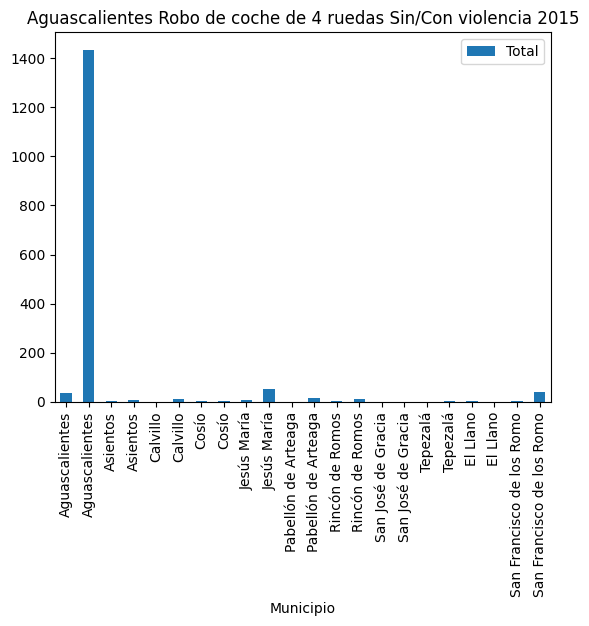

In [11]:
Aguas.plot(kind='bar',x='Municipio',y='Total', title='Aguascalientes Robo de coche de 4 ruedas Sin/Con violencia 2015')

In [12]:
# Calculamos el total de robo de autos en aguascalientes
total_Aguas_2015 = Aguas['Total'].sum()
total_Aguas_2015

1641

In [47]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2015 = cocher15.groupby('Entidad')['Total'].sum().reset_index()
totalrc2015.head()

,Entidad,Total
0,Aguascalientes,1641
1,Baja California,14138
2,Baja California Sur,1157
3,Campeche,73
4,Chiapas,1488


In [14]:
totalrc2015.shape

(32, 2)

<Axes: title={'center': 'Total Robo de coche de 4 ruedas Sin/Con violencia 2015'}, xlabel='Entidad'>

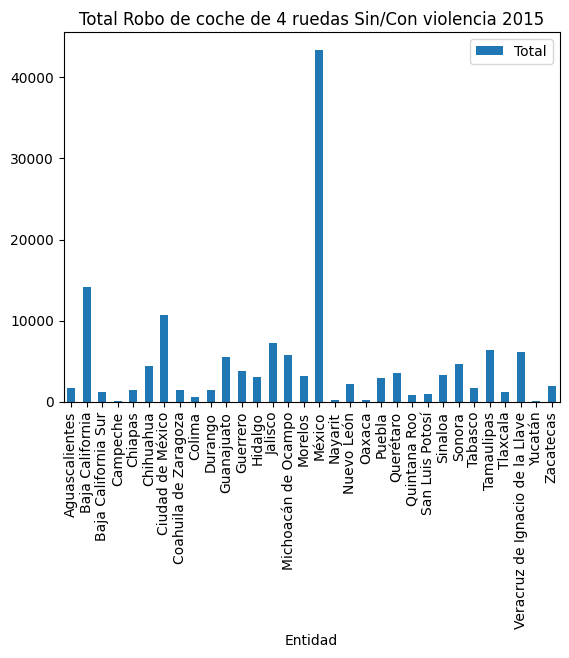

In [15]:
totalrc2015.plot(kind='bar',x='Entidad',y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2015')

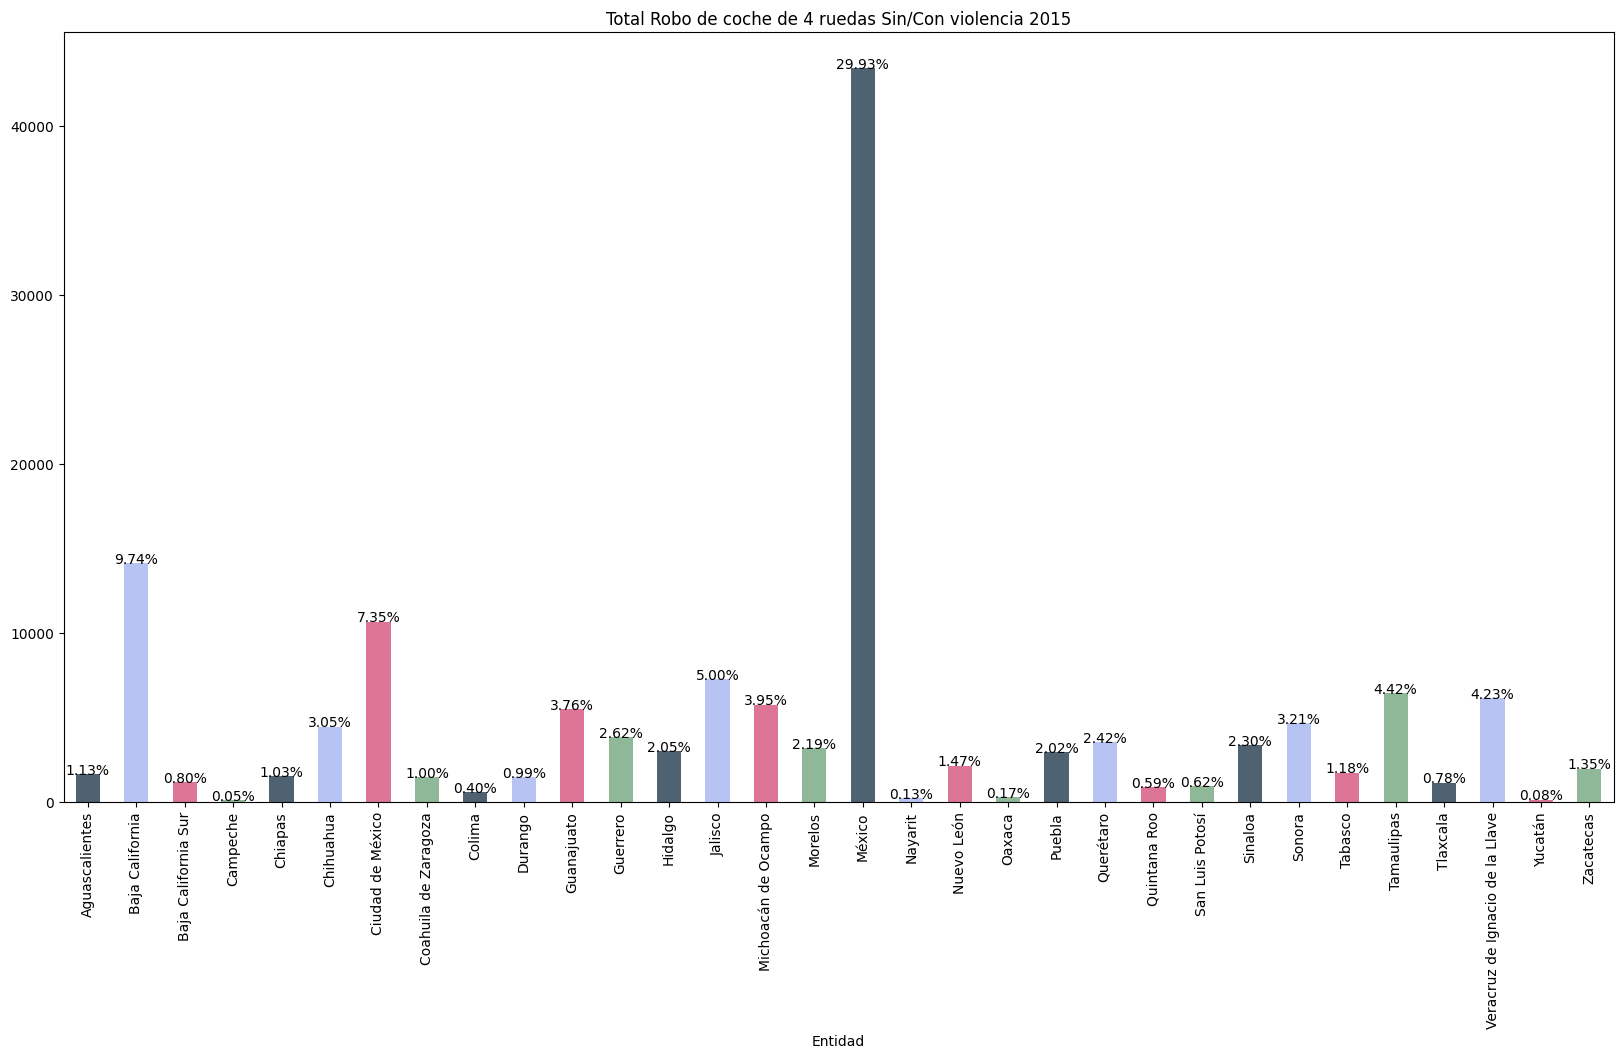

In [16]:
# Calcular los porcentajes
total = sum(totalrc2015['Total'])
totalrc2015['Porcentaje'] = 100 * totalrc2015['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2015.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2015', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2015['Porcentaje']):
    ax.text(i, totalrc2015['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

In [17]:
totalrc2015.loc[totalrc2015['Entidad'] == 'México']

,Entidad,Total,Porcentaje
16,México,43431,29.928883


# Datos 2016

In [18]:
df2016 = pd.read_excel('/content/gdrive/MyDrive/ASE/2016.xlsx')
df2016.info()
df2016.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189238 entries, 0 to 189237
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     189238 non-null  int64 
 1   Clave_Ent               189238 non-null  int64 
 2   Entidad                 189238 non-null  object
 3   Cve. Municipio          189238 non-null  int64 
 4   Municipio               189238 non-null  object
 5   Bien jurídico afectado  189238 non-null  object
 6   Tipo de delito          189238 non-null  object
 7   Subtipo de delito       189238 non-null  object
 8   Modalidad               189238 non-null  object
 9   Enero                   189238 non-null  int64 
 10  Febrero                 189238 non-null  int64 
 11  Marzo                   189238 non-null  int64 
 12  Abril                   189238 non-null  int64 
 13  Mayo                    189238 non-null  int64 
 14  Junio                   189238 non-n

(189238, 21)

In [19]:
df2016b = df2016[~df2016['Subtipo de delito'].isin(['Homicidio doloso', 'Homicidio culposo', 'Lesiones dolosas', 
                                                    'Lesiones culposas', 'Feminicidio', 'Aborto', 
                                                    'Otros delitos que atentan contra la vida y la integridad corporal', 'Secuestro', 
                                                    'Tráfico de menores', 'Rapto', 'Otros delitos que atentan contra la libertad personal', 
                                                    'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual', 'Violación simple', 
                                                    'Violación equiparada', 'Incesto', 
                                                    'Otros delitos que atentan contra la libertad y la seguridad sexual', 
                                                    'Robo a casa habitación', 'Robo a transeúnte en vía pública', 
                                                    'Robo a transeúnte en espacio abierto al público', 
                                                    'Robo en transporte público individual', 
                                                    'Robo en transporte público colectivo', 'Robo en transporte individual', 
                                                    'Robo a institución bancaria', 'Robo a negocio', 'Robo de ganado', 'Robo de maquinaria', 
                                                    'Otros robos', 'Fraude', 'Abuso de confianza', 'Extorsión', 'Daño a la propiedad',
                                                    'Despojo', 'Otros delitos contra el patrimonio', 'Violencia familiar', 
                                                    'Violencia de género en todas sus modalidades distinta a la violencia familiar', 
                                                    'Incumplimiento de obligaciones de asistencia familiar', 
                                                    'Otros delitos contra la familia', 'Corrupción de menores', 'Trata de personas', 
                                                    'Otros delitos contra la sociedad', 'Narcomenudeo', 'Amenazas', 'Allanamiento de morada', 
                                                    'Evasión de presos', 'Falsedad', 'Falsificación', 'Contra el medio ambiente', 
                                                    'Delitos cometidos por servidores públicos', 'Electorales', 'Otros delitos del Fuero Común'])]
df2016b.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,4,3,1,2,4,3,2,3,5,5
42,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,132,...,180,191,178,158,202,236,188,264,203,254
43,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,0,...,1,2,2,2,0,1,0,0,0,1
44,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,31,...,36,36,37,32,40,38,29,31,40,53
45,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Sumamos y creamos una nueva columna en donde venga el total de cada delito en el año
df2016b['Total'] = df2016b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto', 
                            'Septiembre','Octubre', 'Noviembre', 'Diciembre',]].apply(lambda x: x.sum(), axis=1)

df2016b.head()

<ipython-input-48-933798c7353f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2016b['Total'] = df2016b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto',


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,3,1,2,4,3,2,3,5,5,38
42,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,132,...,191,178,158,202,236,188,264,203,254,2336
43,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,0,...,2,2,2,0,1,0,0,0,1,10
44,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,31,...,36,37,32,40,38,29,31,40,53,446
45,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher16 = df2016b.loc[(df2016b['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | 
                       (df2016b['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
cocher16.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,3,1,2,4,3,2,3,5,5,38
42,2016,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,132,...,191,178,158,202,236,188,264,203,254,2336
139,2016,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,0,2,1,1,0,0,0,5
140,2016,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,...,1,1,0,0,0,2,2,1,1,11
237,2016,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,1,0,0,0,0,0,1


In [52]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2016 = cocher16.groupby('Entidad')['Total'].sum().reset_index()
totalrc2016.head()

,Entidad,Total
0,Aguascalientes,2601
1,Baja California,16628
2,Baja California Sur,1746
3,Campeche,196
4,Chiapas,1813


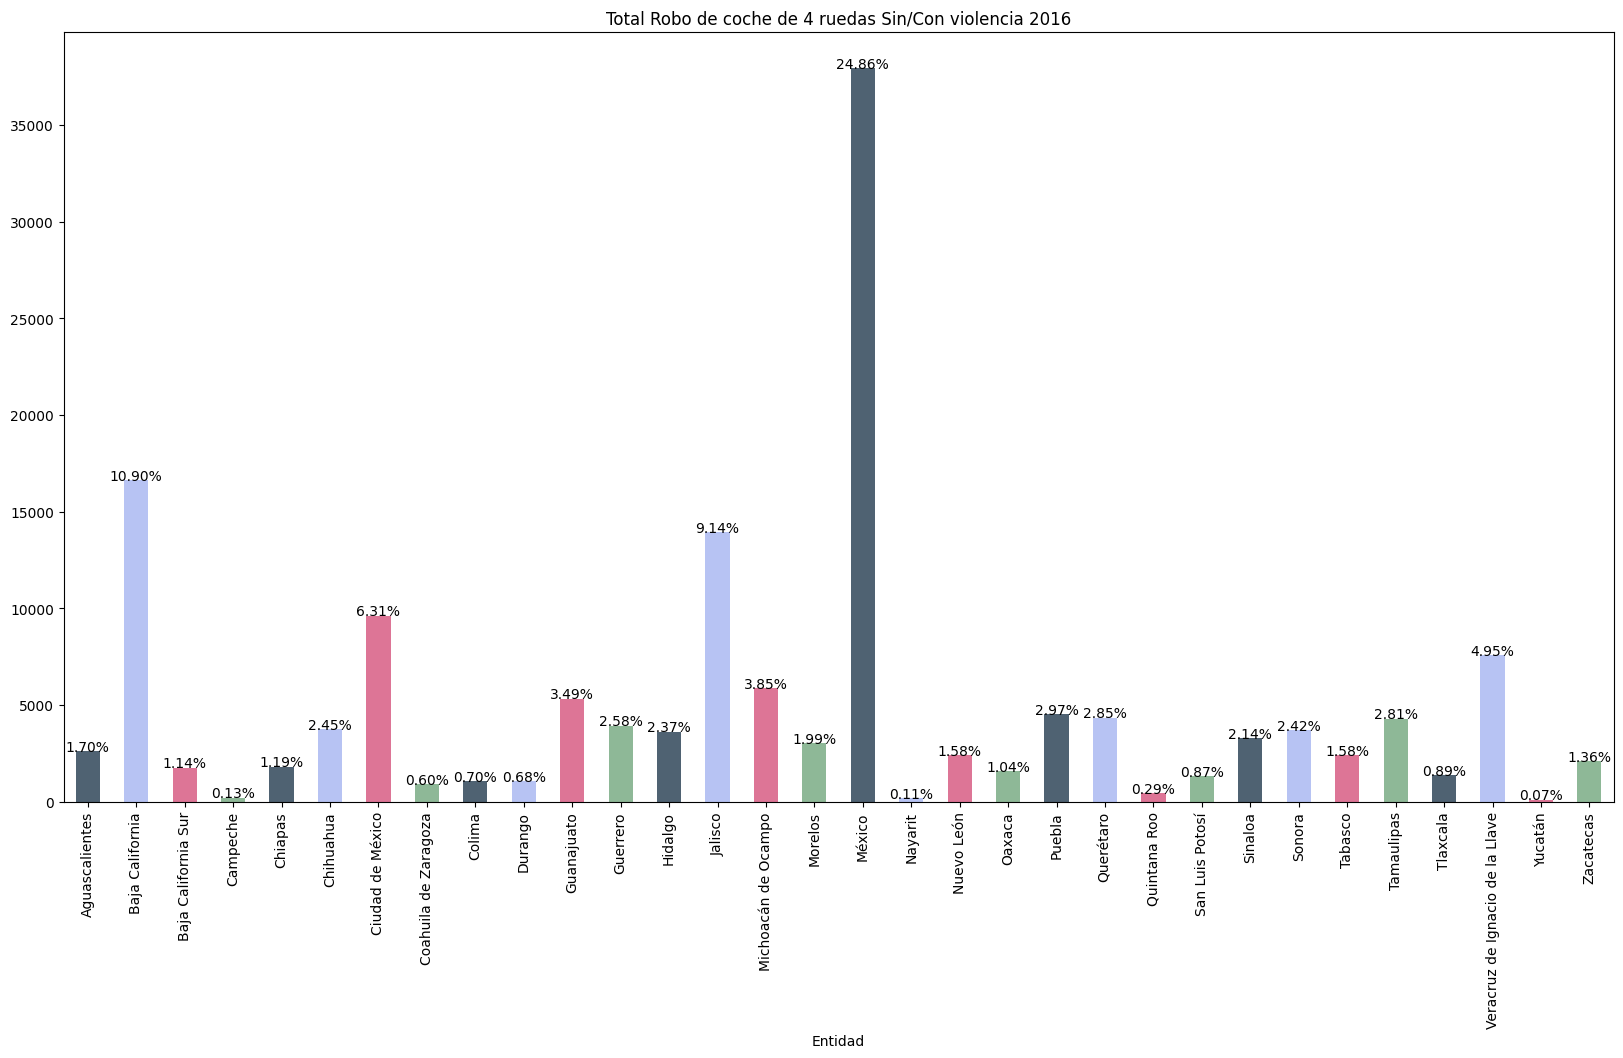

In [53]:
# Calcular los porcentajes
total = sum(totalrc2016['Total'])
totalrc2016['Porcentaje'] = 100 * totalrc2016['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2016.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2016', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2016['Porcentaje']):
    ax.text(i, totalrc2016['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

#Datos 2017

In [24]:
df2017 = pd.read_excel('/content/gdrive/MyDrive/ASE/2017.xlsx')
df2017.info()
df2017.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241668 entries, 0 to 241667
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     241668 non-null  int64 
 1   Clave_Ent               241668 non-null  int64 
 2   Entidad                 241668 non-null  object
 3   Cve. Municipio          241668 non-null  int64 
 4   Municipio               241668 non-null  object
 5   Bien jurídico afectado  241668 non-null  object
 6   Tipo de delito          241668 non-null  object
 7   Subtipo de delito       241668 non-null  object
 8   Modalidad               241668 non-null  object
 9   Enero                   241668 non-null  int64 
 10  Febrero                 241668 non-null  int64 
 11  Marzo                   241668 non-null  int64 
 12  Abril                   241668 non-null  int64 
 13  Mayo                    241668 non-null  int64 
 14  Junio                   241668 non-n

(241668, 21)

In [25]:
df2017.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,...,0,2,3,3,0,3,3,3,3,2
1,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,1,0,2,0,1,0,2,0,0
2,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,2,1,4,4,2,1,3,2,1,1
3,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df2017b = df2017[~df2017['Subtipo de delito'].isin(['Homicidio doloso', 'Homicidio culposo', 'Lesiones dolosas', 
                                                    'Lesiones culposas', 'Feminicidio', 'Aborto', 
                                                    'Otros delitos que atentan contra la vida y la integridad corporal', 'Secuestro', 
                                                    'Tráfico de menores', 'Rapto', 'Otros delitos que atentan contra la libertad personal', 
                                                    'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual', 'Violación simple', 
                                                    'Violación equiparada', 'Incesto', 
                                                    'Otros delitos que atentan contra la libertad y la seguridad sexual', 
                                                    'Robo a casa habitación', 'Robo a transeúnte en vía pública', 
                                                    'Robo a transeúnte en espacio abierto al público', 
                                                    'Robo en transporte público individual', 
                                                    'Robo en transporte público colectivo', 'Robo en transporte individual', 
                                                    'Robo a institución bancaria', 'Robo a negocio', 'Robo de ganado', 'Robo de maquinaria', 
                                                    'Otros robos', 'Fraude', 'Abuso de confianza', 'Extorsión', 'Daño a la propiedad',
                                                    'Despojo', 'Otros delitos contra el patrimonio', 'Violencia familiar', 
                                                    'Violencia de género en todas sus modalidades distinta a la violencia familiar', 
                                                    'Incumplimiento de obligaciones de asistencia familiar', 
                                                    'Otros delitos contra la familia', 'Corrupción de menores', 'Trata de personas', 
                                                    'Otros delitos contra la sociedad', 'Narcomenudeo', 'Amenazas', 'Allanamiento de morada', 
                                                    'Evasión de presos', 'Falsedad', 'Falsificación', 'Contra el medio ambiente', 
                                                    'Delitos cometidos por servidores públicos', 'Electorales', 'Otros delitos del Fuero Común'])]
df2017b.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,2,...,4,5,2,5,6,4,4,4,2,5
42,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,217,...,183,183,200,182,181,232,218,230,210,181
43,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,0,...,4,4,2,3,4,3,4,1,0,0
44,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,40,...,38,45,49,37,53,47,59,67,58,73
45,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Sumamos y creamos una nueva columna en donde venga el total de cada delito en el año
df2017b['Total'] = df2017b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto', 
                            'Septiembre','Octubre', 'Noviembre', 'Diciembre',]].apply(lambda x: x.sum(), axis=1)

df2017b.head()

<ipython-input-55-1a7a8f2edd5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2017b['Total'] = df2017b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto',


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,2,...,5,2,5,6,4,4,4,2,5,46
42,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,217,...,183,200,182,181,232,218,230,210,181,2389
43,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,0,...,4,2,3,4,3,4,1,0,0,25
44,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,40,...,45,49,37,53,47,59,67,58,73,615
45,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher17 = df2017b.loc[(df2017b['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | 
                       (df2017b['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
cocher17.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,2,...,5,2,5,6,4,4,4,2,5,46
42,2017,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,217,...,183,200,182,181,232,218,230,210,181,2389
139,2017,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,1,0,0,0,1
140,2017,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,...,2,0,0,1,2,0,0,0,0,10
237,2017,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,0,1,1,1,0,0,0,4


In [57]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2017 = cocher17.groupby('Entidad')['Total'].sum().reset_index()
totalrc2017.head()

,Entidad,Total
0,Aguascalientes,2838
1,Baja California,19732
2,Baja California Sur,1412
3,Campeche,159
4,Chiapas,1832


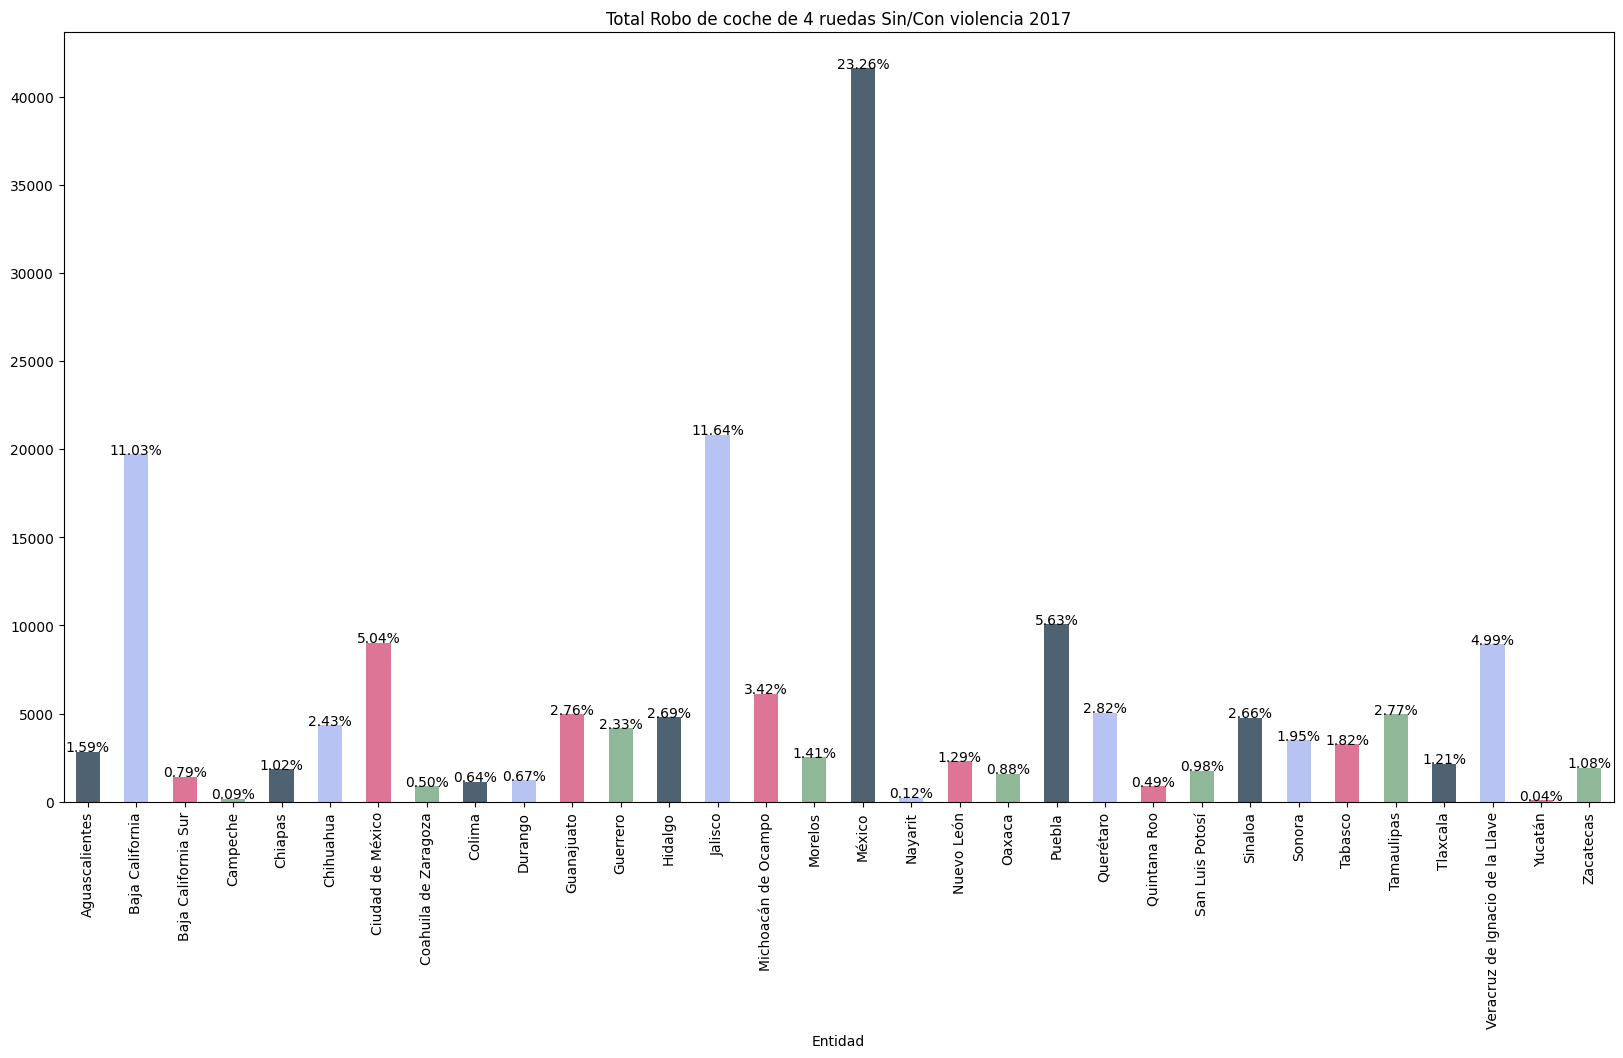

In [58]:
# Calcular los porcentajes
total = sum(totalrc2017['Total'])
totalrc2017['Porcentaje'] = 100 * totalrc2017['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2017.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2017', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2017['Porcentaje']):
    ax.text(i, totalrc2017['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Datos 2018

In [27]:
df2018 = pd.read_excel('/content/gdrive/MyDrive/ASE/2018.xlsx')
df2018.info()
df2018.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242158 entries, 0 to 242157
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242158 non-null  int64 
 1   Clave_Ent               242158 non-null  int64 
 2   Entidad                 242158 non-null  object
 3   Cve. Municipio          242158 non-null  int64 
 4   Municipio               242158 non-null  object
 5   Bien jurídico afectado  242158 non-null  object
 6   Tipo de delito          242158 non-null  object
 7   Subtipo de delito       242158 non-null  object
 8   Modalidad               242158 non-null  object
 9   Enero                   242158 non-null  int64 
 10  Febrero                 242158 non-null  int64 
 11  Marzo                   242158 non-null  int64 
 12  Abril                   242158 non-null  int64 
 13  Mayo                    242158 non-null  int64 
 14  Junio                   242158 non-n

(242158, 21)

In [28]:
df2018.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,4,...,3,3,3,1,1,2,4,2,4,3
1,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,1,0,2,0,0,0,1,0,1,0
2,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,2,...,0,2,2,3,0,1,0,1,0,0
3,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,1,0,0,0,0,0,0,0,0
4,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
df2018b = df2018[~df2018['Subtipo de delito'].isin(['Homicidio doloso', 'Homicidio culposo', 'Lesiones dolosas', 
                                                    'Lesiones culposas', 'Feminicidio', 'Aborto', 
                                                    'Otros delitos que atentan contra la vida y la integridad corporal', 'Secuestro', 
                                                    'Tráfico de menores', 'Rapto', 'Otros delitos que atentan contra la libertad personal', 
                                                    'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual', 'Violación simple', 
                                                    'Violación equiparada', 'Incesto', 
                                                    'Otros delitos que atentan contra la libertad y la seguridad sexual', 
                                                    'Robo a casa habitación', 'Robo a transeúnte en vía pública', 
                                                    'Robo a transeúnte en espacio abierto al público', 
                                                    'Robo en transporte público individual', 
                                                    'Robo en transporte público colectivo', 'Robo en transporte individual', 
                                                    'Robo a institución bancaria', 'Robo a negocio', 'Robo de ganado', 'Robo de maquinaria', 
                                                    'Otros robos', 'Fraude', 'Abuso de confianza', 'Extorsión', 'Daño a la propiedad',
                                                    'Despojo', 'Otros delitos contra el patrimonio', 'Violencia familiar', 
                                                    'Violencia de género en todas sus modalidades distinta a la violencia familiar', 
                                                    'Incumplimiento de obligaciones de asistencia familiar', 
                                                    'Otros delitos contra la familia', 'Corrupción de menores', 'Trata de personas', 
                                                    'Otros delitos contra la sociedad', 'Narcomenudeo', 'Amenazas', 'Allanamiento de morada', 
                                                    'Evasión de presos', 'Falsedad', 'Falsificación', 'Contra el medio ambiente', 
                                                    'Delitos cometidos por servidores públicos', 'Electorales', 'Otros delitos del Fuero Común'])]
df2018b.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,3,...,2,5,6,6,5,8,3,9,3,4
42,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,198,...,188,222,189,169,187,169,133,182,138,132
43,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,1,...,0,1,0,5,3,1,1,1,2,1
44,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,45,...,60,63,52,45,59,49,37,49,54,54
45,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Sumamos y creamos una nueva columna en donde venga el total de cada delito en el año
df2018b['Total'] = df2018b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto', 
                            'Septiembre','Octubre', 'Noviembre', 'Diciembre',]].apply(lambda x: x.sum(), axis=1)

df2018b.head()

<ipython-input-60-6bf170f60523>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2018b['Total'] = df2018b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto',


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,3,...,5,6,6,5,8,3,9,3,4,62
42,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,198,...,222,189,169,187,169,133,182,138,132,2070
43,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,1,...,1,0,5,3,1,1,1,2,1,20
44,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,45,...,63,52,45,59,49,37,49,54,54,606
45,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher18 = df2018b.loc[(df2018b['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | 
                       (df2018b['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
cocher18.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,3,...,5,6,6,5,8,3,9,3,4,62
42,2018,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,198,...,222,189,169,187,169,133,182,138,132,2070
139,2018,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,1,0,0,0,1
140,2018,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,1,0,0,0,0,1,1,1,0,7
237,2018,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,1,0,0,0,0,0,0,3


In [62]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2018 = cocher18.groupby('Entidad')['Total'].sum().reset_index()
totalrc2018.head()

,Entidad,Total
0,Aguascalientes,2523
1,Baja California,15425
2,Baja California Sur,1233
3,Campeche,120
4,Chiapas,1134


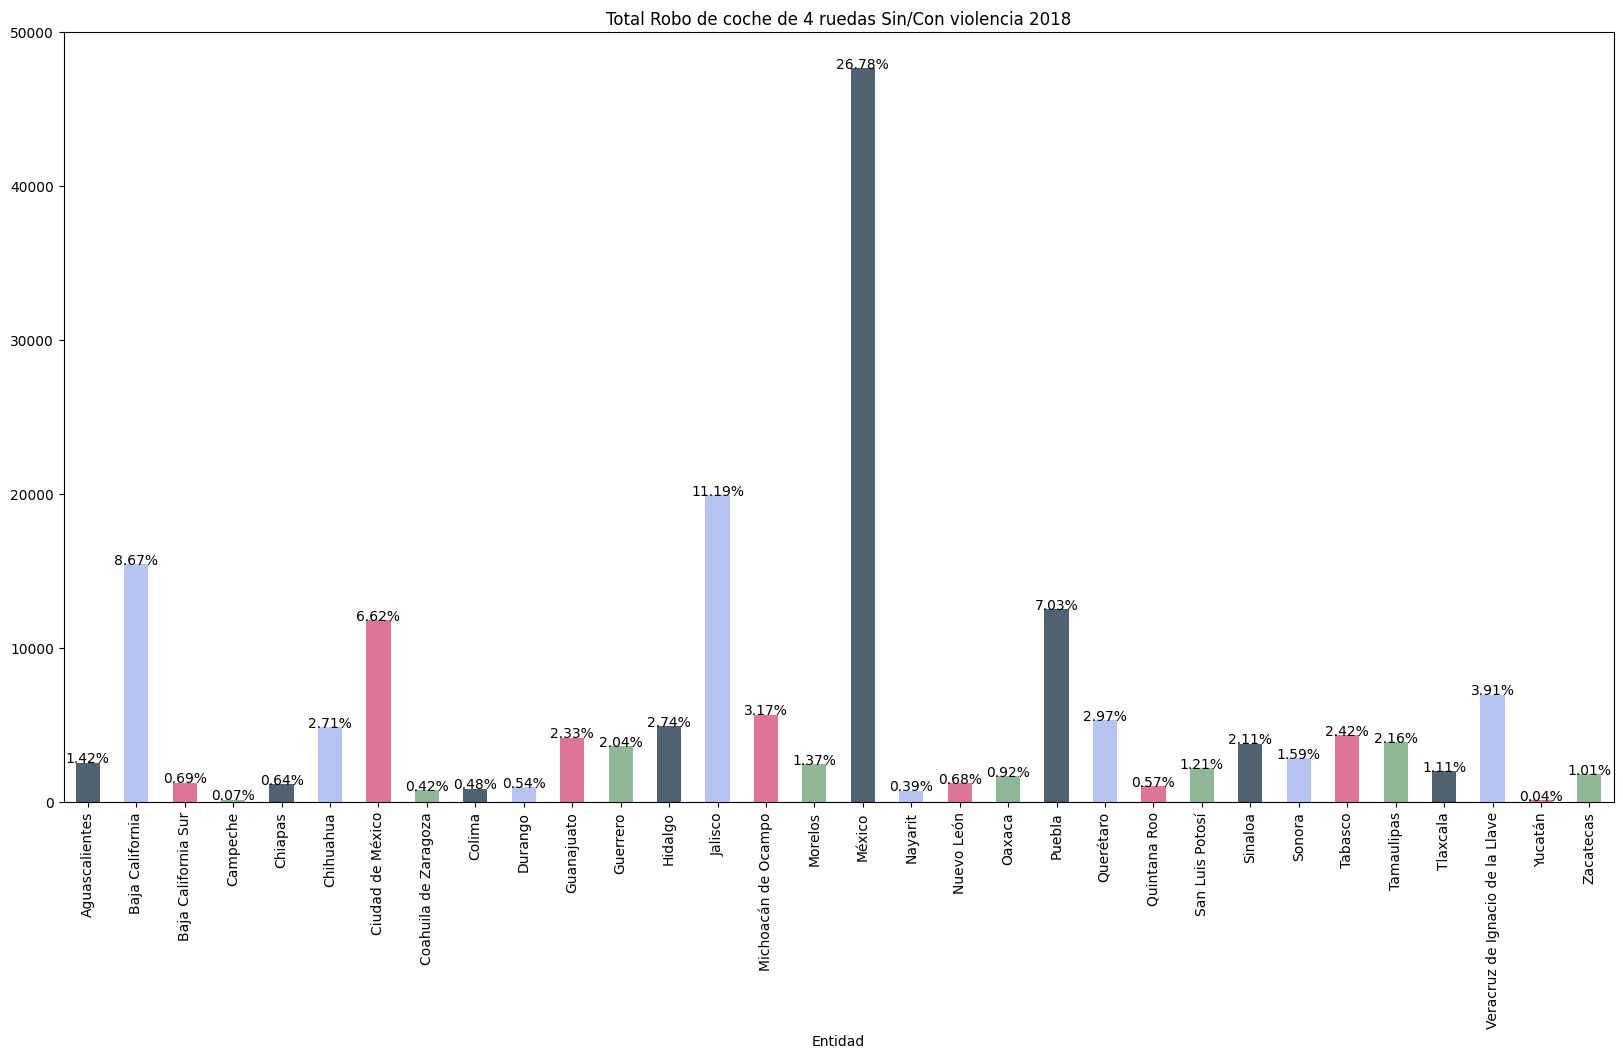

In [63]:
# Calcular los porcentajes
total = sum(totalrc2018['Total'])
totalrc2018['Porcentaje'] = 100 * totalrc2018['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2018.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2018', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2018['Porcentaje']):
    ax.text(i, totalrc2018['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Datos 2019

In [29]:
df2019 = pd.read_excel('/content/gdrive/MyDrive/ASE/2019.xlsx')
df2019.info()
df2019.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242158 entries, 0 to 242157
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242158 non-null  int64 
 1   Clave_Ent               242158 non-null  int64 
 2   Entidad                 242158 non-null  object
 3   Cve. Municipio          242158 non-null  int64 
 4   Municipio               242158 non-null  object
 5   Bien jurídico afectado  242158 non-null  object
 6   Tipo de delito          242158 non-null  object
 7   Subtipo de delito       242158 non-null  object
 8   Modalidad               242158 non-null  object
 9   Enero                   242158 non-null  int64 
 10  Febrero                 242158 non-null  int64 
 11  Marzo                   242158 non-null  int64 
 12  Abril                   242158 non-null  int64 
 13  Mayo                    242158 non-null  int64 
 14  Junio                   242158 non-n

(242158, 21)

In [30]:
df2019.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,5,...,2,2,2,4,2,0,7,6,2,1
1,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,2,2,0,1,0,0,0,2,2
2,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,1,...,2,2,1,1,0,0,0,0,1,1
3,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,2,0,0,0,0,0,0,0
4,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
df2019b = df2019[~df2019['Subtipo de delito'].isin(['Homicidio doloso', 'Homicidio culposo', 'Lesiones dolosas', 
                                                    'Lesiones culposas', 'Feminicidio', 'Aborto', 
                                                    'Otros delitos que atentan contra la vida y la integridad corporal', 'Secuestro', 
                                                    'Tráfico de menores', 'Rapto', 'Otros delitos que atentan contra la libertad personal', 
                                                    'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual', 'Violación simple', 
                                                    'Violación equiparada', 'Incesto', 
                                                    'Otros delitos que atentan contra la libertad y la seguridad sexual', 
                                                    'Robo a casa habitación', 'Robo a transeúnte en vía pública', 
                                                    'Robo a transeúnte en espacio abierto al público', 
                                                    'Robo en transporte público individual', 
                                                    'Robo en transporte público colectivo', 'Robo en transporte individual', 
                                                    'Robo a institución bancaria', 'Robo a negocio', 'Robo de ganado', 'Robo de maquinaria', 
                                                    'Otros robos', 'Fraude', 'Abuso de confianza', 'Extorsión', 'Daño a la propiedad',
                                                    'Despojo', 'Otros delitos contra el patrimonio', 'Violencia familiar', 
                                                    'Violencia de género en todas sus modalidades distinta a la violencia familiar', 
                                                    'Incumplimiento de obligaciones de asistencia familiar', 
                                                    'Otros delitos contra la familia', 'Corrupción de menores', 'Trata de personas', 
                                                    'Otros delitos contra la sociedad', 'Narcomenudeo', 'Amenazas', 'Allanamiento de morada', 
                                                    'Evasión de presos', 'Falsedad', 'Falsificación', 'Contra el medio ambiente', 
                                                    'Delitos cometidos por servidores públicos', 'Electorales', 'Otros delitos del Fuero Común'])]
df2019b.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,7,11,2,3,8,5,3,3,3,3
42,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,146,...,114,100,120,94,68,64,82,87,142,141
43,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,1,...,1,2,2,3,0,0,2,2,2,3
44,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,62,...,52,48,45,53,40,56,27,46,38,49
45,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Sumamos y creamos una nueva columna en donde venga el total de cada delito en el año
df2019b['Total'] = df2019b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto', 
                            'Septiembre','Octubre', 'Noviembre', 'Diciembre',]].apply(lambda x: x.sum(), axis=1)

df2019b.head()

<ipython-input-65-16027e3a766e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019b['Total'] = df2019b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto',


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,11,2,3,8,5,3,3,3,3,54
42,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,146,...,100,120,94,68,64,82,87,142,141,1277
43,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,1,...,2,2,3,0,0,2,2,2,3,20
44,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,62,...,48,45,53,40,56,27,46,38,49,573
45,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher19 = df2019b.loc[(df2019b['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | 
                       (df2019b['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
cocher19.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,11,2,3,8,5,3,3,3,3,54
42,2019,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,146,...,100,120,94,68,64,82,87,142,141,1277
139,2019,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,2,0,0,1,0,0,0,1,0,6
140,2019,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,...,2,2,1,0,0,0,1,0,2,9
237,2019,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,0,0,0,0,0,0,0,1


In [67]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2019 = cocher19.groupby('Entidad')['Total'].sum().reset_index()
totalrc2019.head()

,Entidad,Total
0,Aguascalientes,1642
1,Baja California,13412
2,Baja California Sur,761
3,Campeche,153
4,Chiapas,905


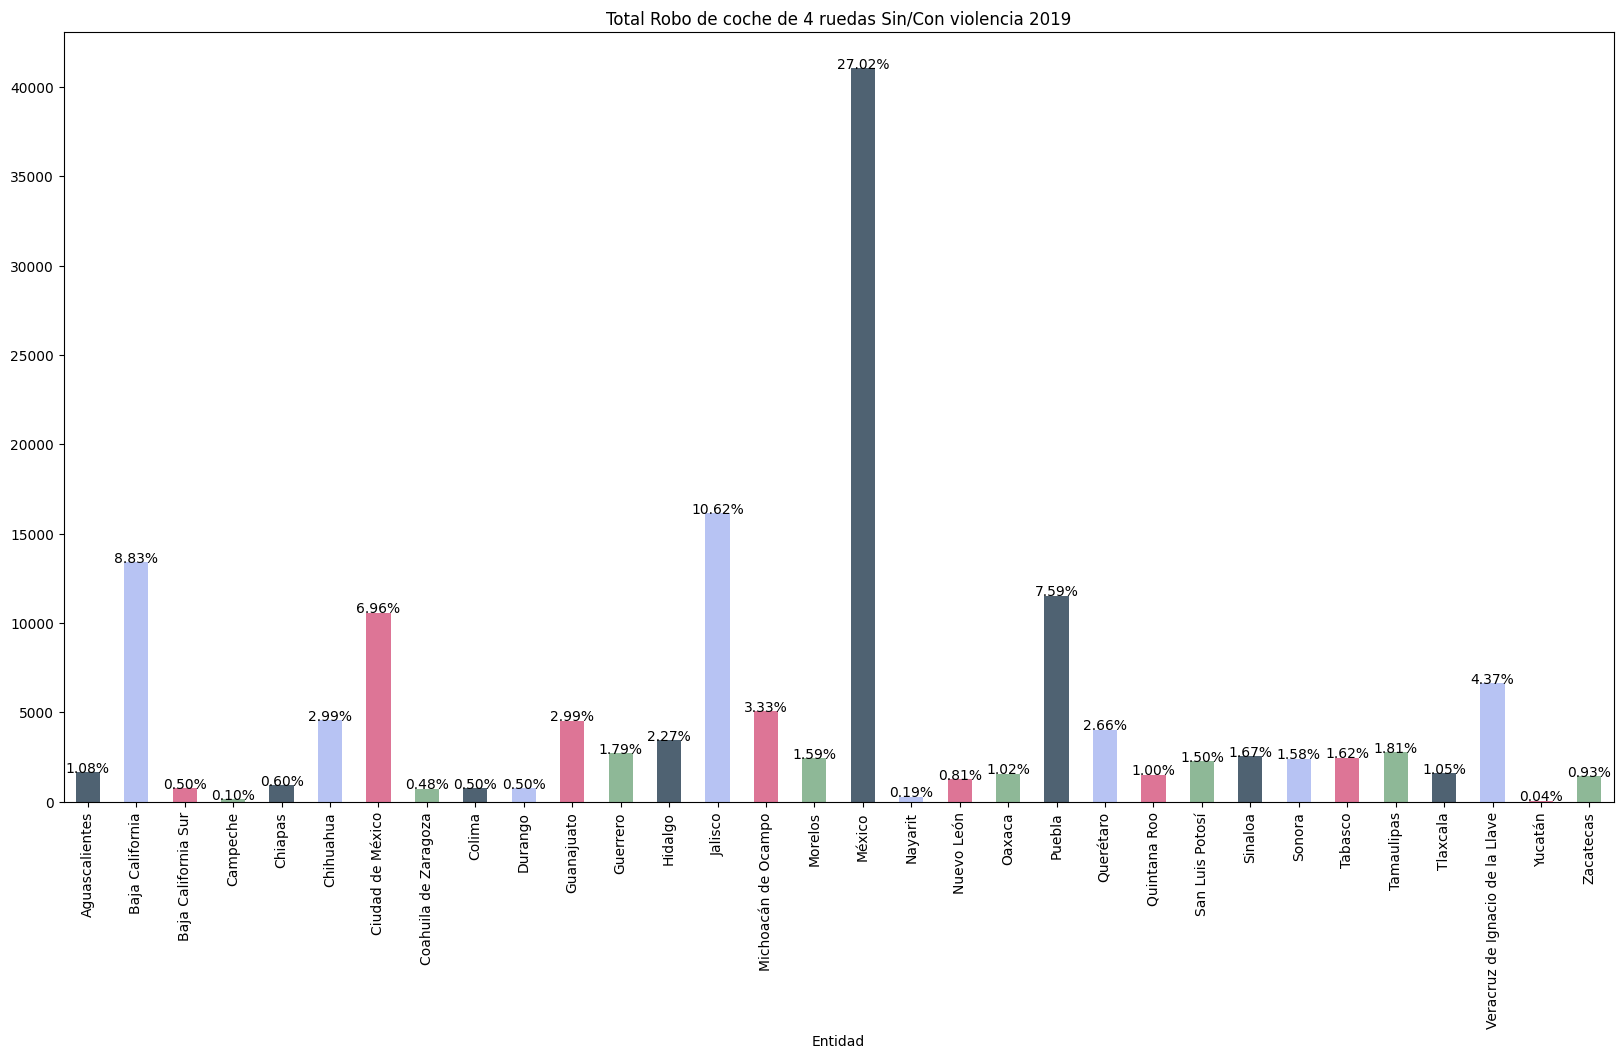

In [68]:
# Calcular los porcentajes
total = sum(totalrc2019['Total'])
totalrc2019['Porcentaje'] = 100 * totalrc2019['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2019.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2019', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2019['Porcentaje']):
    ax.text(i, totalrc2019['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Datos 2020

In [31]:
df2020 = pd.read_excel('/content/gdrive/MyDrive/ASE/2020.xlsx')
df2020.info()
df2020.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242158 entries, 0 to 242157
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242158 non-null  int64 
 1   Clave_Ent               242158 non-null  int64 
 2   Entidad                 242158 non-null  object
 3   Cve. Municipio          242158 non-null  int64 
 4   Municipio               242158 non-null  object
 5   Bien jurídico afectado  242158 non-null  object
 6   Tipo de delito          242158 non-null  object
 7   Subtipo de delito       242158 non-null  object
 8   Modalidad               242158 non-null  object
 9   Enero                   242158 non-null  int64 
 10  Febrero                 242158 non-null  int64 
 11  Marzo                   242158 non-null  int64 
 12  Abril                   242158 non-null  int64 
 13  Mayo                    242158 non-null  int64 
 14  Junio                   242158 non-n

(242158, 21)

In [32]:
df2020.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,3,3,2,3,5,2,1,1,1,1
1,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,...,2,0,2,0,1,1,0,0,1,0
2,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,1,...,1,0,2,2,1,2,0,2,0,0
3,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df2020b = df2020[~df2020['Subtipo de delito'].isin(['Homicidio doloso', 'Homicidio culposo', 'Lesiones dolosas', 
                                                    'Lesiones culposas', 'Feminicidio', 'Aborto', 
                                                    'Otros delitos que atentan contra la vida y la integridad corporal', 'Secuestro', 
                                                    'Tráfico de menores', 'Rapto', 'Otros delitos que atentan contra la libertad personal', 
                                                    'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual', 'Violación simple', 
                                                    'Violación equiparada', 'Incesto', 
                                                    'Otros delitos que atentan contra la libertad y la seguridad sexual', 
                                                    'Robo a casa habitación', 'Robo a transeúnte en vía pública', 
                                                    'Robo a transeúnte en espacio abierto al público', 
                                                    'Robo en transporte público individual', 
                                                    'Robo en transporte público colectivo', 'Robo en transporte individual', 
                                                    'Robo a institución bancaria', 'Robo a negocio', 'Robo de ganado', 'Robo de maquinaria', 
                                                    'Otros robos', 'Fraude', 'Abuso de confianza', 'Extorsión', 'Daño a la propiedad',
                                                    'Despojo', 'Otros delitos contra el patrimonio', 'Violencia familiar', 
                                                    'Violencia de género en todas sus modalidades distinta a la violencia familiar', 
                                                    'Incumplimiento de obligaciones de asistencia familiar', 
                                                    'Otros delitos contra la familia', 'Corrupción de menores', 'Trata de personas', 
                                                    'Otros delitos contra la sociedad', 'Narcomenudeo', 'Amenazas', 'Allanamiento de morada', 
                                                    'Evasión de presos', 'Falsedad', 'Falsificación', 'Contra el medio ambiente', 
                                                    'Delitos cometidos por servidores públicos', 'Electorales', 'Otros delitos del Fuero Común'])]
df2020b.head()


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,4,0,4,3,2,5,2,4,4,2
42,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,98,...,113,80,74,62,66,69,64,59,61,65
43,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,2,...,1,2,3,2,1,1,1,2,2,0
44,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,37,...,41,24,24,22,17,36,29,33,35,38
45,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Sumamos y creamos una nueva columna en donde venga el total de cada delito en el año
df2020b['Total'] = df2020b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto', 
                            'Septiembre','Octubre', 'Noviembre', 'Diciembre',]].apply(lambda x: x.sum(), axis=1)

df2020b.head()


<ipython-input-70-60a4c9a1249e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020b['Total'] = df2020b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto',


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,0,4,3,2,5,2,4,4,2,39
42,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,98,...,80,74,62,66,69,64,59,61,65,906
43,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,2,...,2,3,2,1,1,1,2,2,0,18
44,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,37,...,24,24,22,17,36,29,33,35,38,372
45,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher20 = df2020b.loc[(df2020b['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | 
                       (df2020b['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
cocher20.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,0,4,3,2,5,2,4,4,2,39
42,2020,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,98,...,80,74,62,66,69,64,59,61,65,906
139,2020,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,3,0,0,0,0,0,0,0,0,4
140,2020,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,1,0,0,0,0,1,1,0,4
237,2020,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,0,0,0,0,1,0,0,2


In [72]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2020 = cocher20.groupby('Entidad')['Total'].sum().reset_index()
totalrc2020.head()

,Entidad,Total
0,Aguascalientes,1106
1,Baja California,9803
2,Baja California Sur,594
3,Campeche,100
4,Chiapas,872


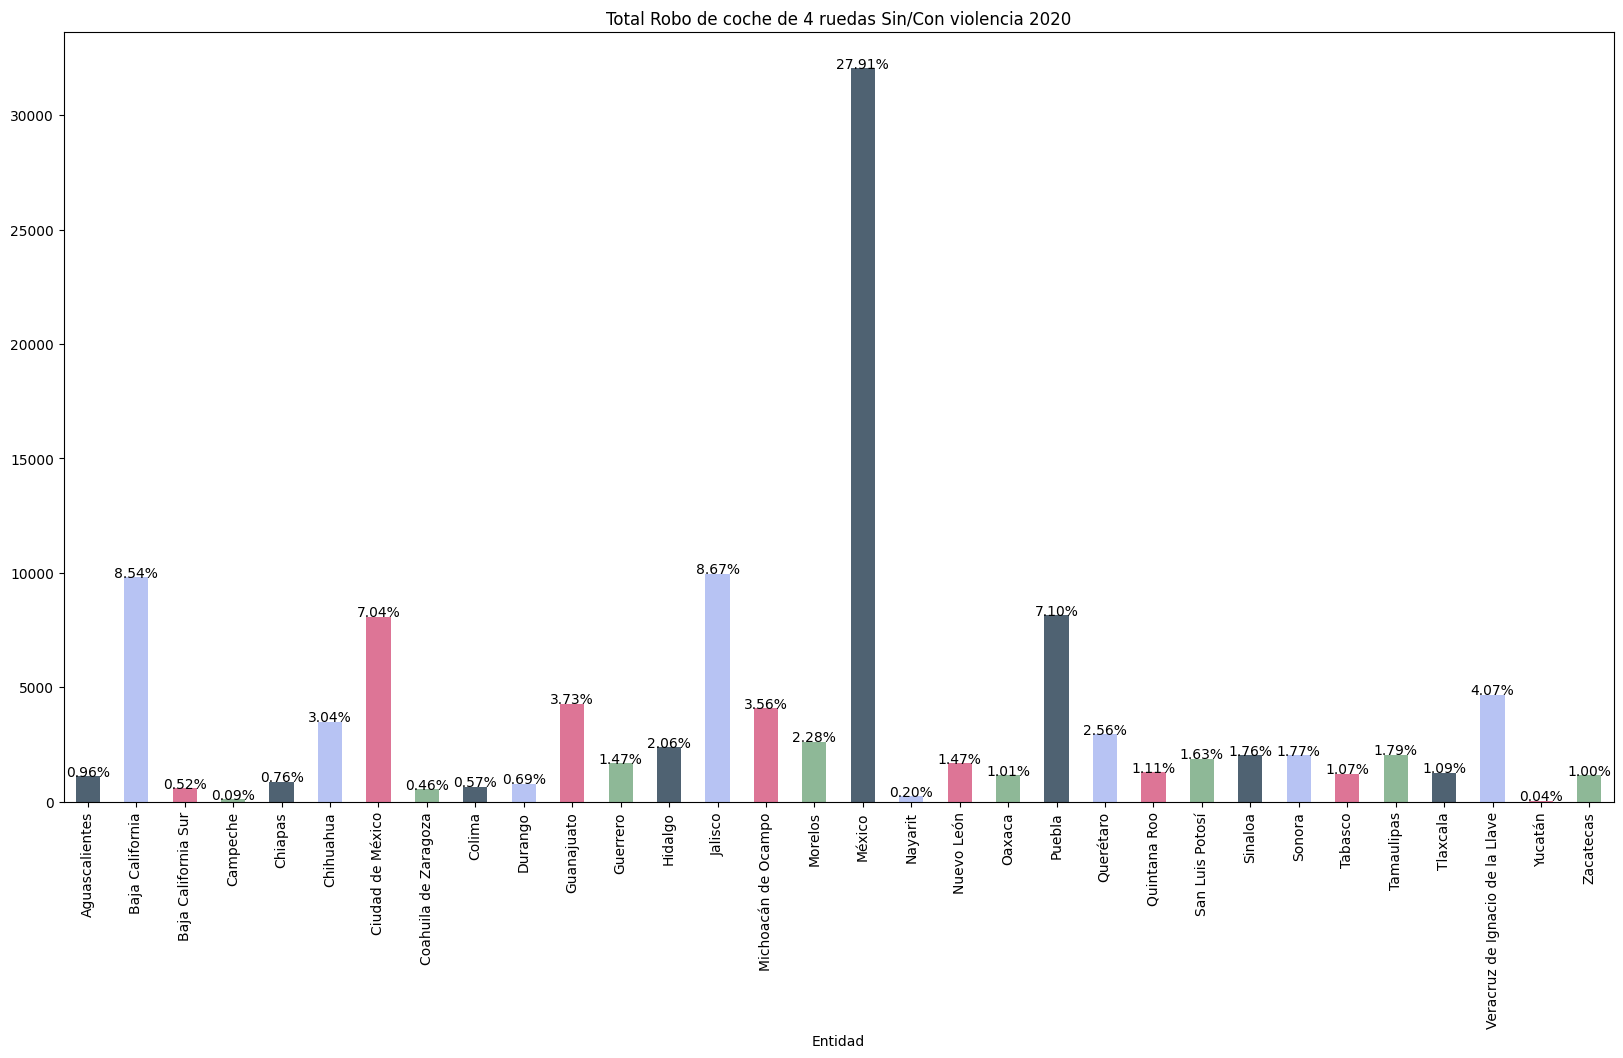

In [73]:
# Calcular los porcentajes
total = sum(totalrc2020['Total'])
totalrc2020['Porcentaje'] = 100 * totalrc2020['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2020.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2020', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2020['Porcentaje']):
    ax.text(i, totalrc2020['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Datos 2021

In [33]:
df2021 = pd.read_excel('/content/gdrive/MyDrive/ASE/2021.xlsx')
df2021.info()
df2021.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242844 entries, 0 to 242843
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242844 non-null  int64 
 1   Clave_Ent               242844 non-null  int64 
 2   Entidad                 242844 non-null  object
 3   Cve. Municipio          242844 non-null  int64 
 4   Municipio               242844 non-null  object
 5   Bien jurídico afectado  242844 non-null  object
 6   Tipo de delito          242844 non-null  object
 7   Subtipo de delito       242844 non-null  object
 8   Modalidad               242844 non-null  object
 9   Enero                   242844 non-null  int64 
 10  Febrero                 242844 non-null  int64 
 11  Marzo                   242844 non-null  int64 
 12  Abril                   242844 non-null  int64 
 13  Mayo                    242844 non-null  int64 
 14  Junio                   242844 non-n

(242844, 21)

In [34]:
df2021.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,1,...,2,3,1,1,1,2,2,6,0,1
1,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,...,0,0,0,2,2,1,1,1,0,3
2,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,0,2,1,1,2,1,2,1,1
3,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,1,0,0,0


In [74]:
df2021b = df2021[~df2021['Subtipo de delito'].isin(['Homicidio doloso', 'Homicidio culposo', 'Lesiones dolosas', 
                                                    'Lesiones culposas', 'Feminicidio', 'Aborto', 
                                                    'Otros delitos que atentan contra la vida y la integridad corporal', 'Secuestro', 
                                                    'Tráfico de menores', 'Rapto', 'Otros delitos que atentan contra la libertad personal', 
                                                    'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual', 'Violación simple', 
                                                    'Violación equiparada', 'Incesto', 
                                                    'Otros delitos que atentan contra la libertad y la seguridad sexual', 
                                                    'Robo a casa habitación', 'Robo a transeúnte en vía pública', 
                                                    'Robo a transeúnte en espacio abierto al público', 
                                                    'Robo en transporte público individual', 
                                                    'Robo en transporte público colectivo', 'Robo en transporte individual', 
                                                    'Robo a institución bancaria', 'Robo a negocio', 'Robo de ganado', 'Robo de maquinaria', 
                                                    'Otros robos', 'Fraude', 'Abuso de confianza', 'Extorsión', 'Daño a la propiedad',
                                                    'Despojo', 'Otros delitos contra el patrimonio', 'Violencia familiar', 
                                                    'Violencia de género en todas sus modalidades distinta a la violencia familiar', 
                                                    'Incumplimiento de obligaciones de asistencia familiar', 
                                                    'Otros delitos contra la familia', 'Corrupción de menores', 'Trata de personas', 
                                                    'Otros delitos contra la sociedad', 'Narcomenudeo', 'Amenazas', 'Allanamiento de morada', 
                                                    'Evasión de presos', 'Falsedad', 'Falsificación', 'Contra el medio ambiente', 
                                                    'Delitos cometidos por servidores públicos', 'Electorales', 'Otros delitos del Fuero Común'])]
df2021b.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,9,...,2,2,6,1,5,3,2,3,1,5
42,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,58,...,51,46,56,42,50,39,39,48,41,47
43,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,0,...,2,2,0,1,2,0,0,2,3,0
44,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,35,...,27,29,30,22,35,26,35,23,31,43
45,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# Sumamos y creamos una nueva columna en donde venga el total de cada delito en el año
df2021b['Total'] = df2021b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto', 
                            'Septiembre','Octubre', 'Noviembre', 'Diciembre',]].apply(lambda x: x.sum(), axis=1)

df2021b.head()

<ipython-input-75-41412022008f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021b['Total'] = df2021b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto',


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,9,...,2,6,1,5,3,2,3,1,5,47
42,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,58,...,46,56,42,50,39,39,48,41,47,574
43,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,0,...,2,0,1,2,0,0,2,3,0,13
44,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,35,...,29,30,22,35,26,35,23,31,43,368
45,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher21 = df2021b.loc[(df2021b['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | 
                       (df2021b['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
cocher21.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,9,...,2,6,1,5,3,2,3,1,5,47
42,2021,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,58,...,46,56,42,50,39,39,48,41,47,574
139,2021,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1,...,0,0,0,0,1,0,1,2,0,6
140,2021,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,0,0,0,1,1,2,1,6
237,2021,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,1,0,0,0,0,2,1,0,1,5


In [77]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2021 = cocher21.groupby('Entidad')['Total'].sum().reset_index()
totalrc2021.head()

,Entidad,Total
0,Aguascalientes,778
1,Baja California,10875
2,Baja California Sur,402
3,Campeche,76
4,Chiapas,665


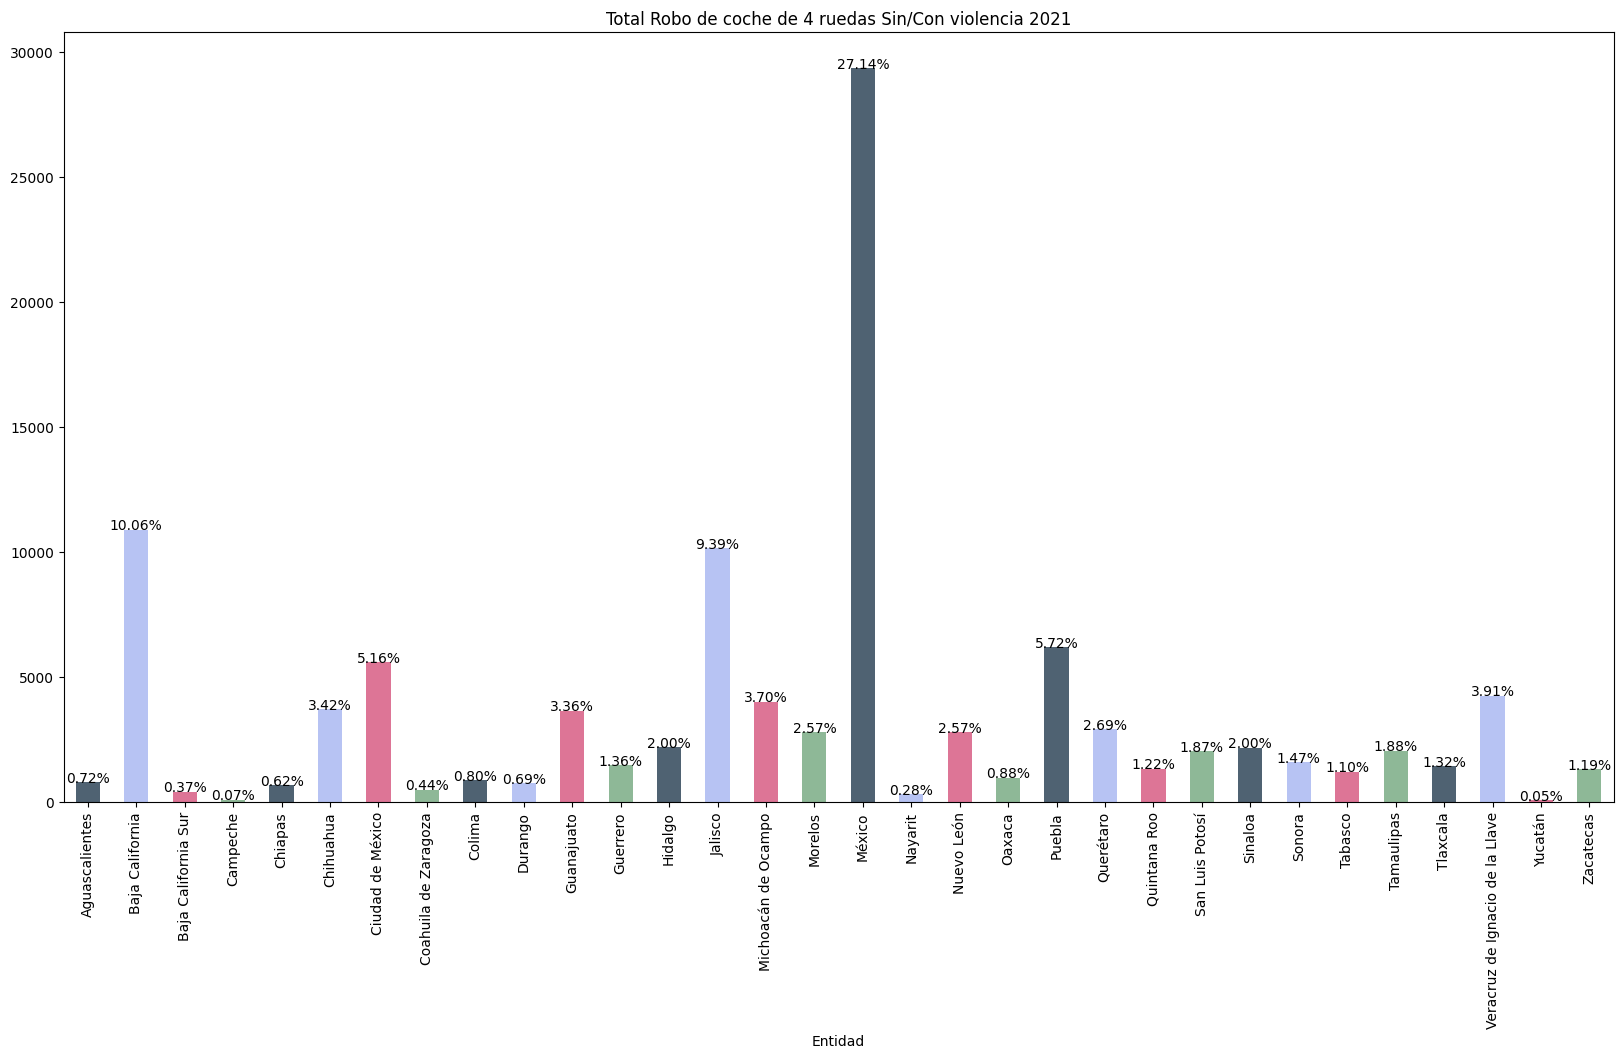

In [78]:
# Calcular los porcentajes
total = sum(totalrc2021['Total'])
totalrc2021['Porcentaje'] = 100 * totalrc2021['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2021.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2021', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2021['Porcentaje']):
    ax.text(i, totalrc2021['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Datos 2022

In [35]:
df2022 = pd.read_excel('/content/gdrive/MyDrive/ASE/2022.xlsx')
df2022.info()
df2022.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242942 entries, 0 to 242941
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242942 non-null  int64 
 1   Clave_Ent               242942 non-null  int64 
 2   Entidad                 242942 non-null  object
 3   Cve. Municipio          242942 non-null  int64 
 4   Municipio               242942 non-null  object
 5   Bien jurídico afectado  242942 non-null  object
 6   Tipo de delito          242942 non-null  object
 7   Subtipo de delito       242942 non-null  object
 8   Modalidad               242942 non-null  object
 9   Enero                   242942 non-null  int64 
 10  Febrero                 242942 non-null  int64 
 11  Marzo                   242942 non-null  int64 
 12  Abril                   242942 non-null  int64 
 13  Mayo                    242942 non-null  int64 
 14  Junio                   242942 non-n

(242942, 21)

In [36]:
df2022.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2022,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,2,0,0,3,0,2,5,1,1,1
1,2022,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,2,...,1,0,0,2,0,0,1,0,0,0
2,2022,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,0,0,2,0,0,3,1,3,0,1
3,2022,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df2022b = df2022[~df2022['Subtipo de delito'].isin(['Homicidio doloso', 'Homicidio culposo', 'Lesiones dolosas', 
                                                    'Lesiones culposas', 'Feminicidio', 'Aborto', 
                                                    'Otros delitos que atentan contra la vida y la integridad corporal', 'Secuestro', 
                                                    'Tráfico de menores', 'Rapto', 'Otros delitos que atentan contra la libertad personal', 
                                                    'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual', 'Violación simple', 
                                                    'Violación equiparada', 'Incesto', 
                                                    'Otros delitos que atentan contra la libertad y la seguridad sexual', 
                                                    'Robo a casa habitación', 'Robo a transeúnte en vía pública', 
                                                    'Robo a transeúnte en espacio abierto al público', 
                                                    'Robo en transporte público individual', 
                                                    'Robo en transporte público colectivo', 'Robo en transporte individual', 
                                                    'Robo a institución bancaria', 'Robo a negocio', 'Robo de ganado', 'Robo de maquinaria', 
                                                    'Otros robos', 'Fraude', 'Abuso de confianza', 'Extorsión', 'Daño a la propiedad',
                                                    'Despojo', 'Otros delitos contra el patrimonio', 'Violencia familiar', 
                                                    'Violencia de género en todas sus modalidades distinta a la violencia familiar', 
                                                    'Incumplimiento de obligaciones de asistencia familiar', 
                                                    'Otros delitos contra la familia', 'Corrupción de menores', 'Trata de personas', 
                                                    'Otros delitos contra la sociedad', 'Narcomenudeo', 'Amenazas', 'Allanamiento de morada', 
                                                    'Evasión de presos', 'Falsedad', 'Falsificación', 'Contra el medio ambiente', 
                                                    'Delitos cometidos por servidores públicos', 'Electorales', 'Otros delitos del Fuero Común'])]
df2022b.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,2,...,2,3,2,6,2,4,3,2,6,10
42,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,35,...,67,60,39,40,42,45,46,54,31,36
43,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,2,...,3,2,0,2,3,3,1,1,2,3
44,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,42,...,24,29,38,37,35,34,39,47,39,55
45,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# Sumamos y creamos una nueva columna en donde venga el total de cada delito en el año
df2022b['Total'] = df2022b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto', 
                            'Septiembre','Octubre', 'Noviembre', 'Diciembre',]].apply(lambda x: x.sum(), axis=1)

df2022b.head()

<ipython-input-80-908cbf97129a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022b['Total'] = df2022b[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto',


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,2,...,3,2,6,2,4,3,2,6,10,48
42,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,35,...,60,39,40,42,45,46,54,31,36,540
43,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,2,...,2,0,2,3,3,1,1,2,3,24
44,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,42,...,29,38,37,35,34,39,47,39,55,460
45,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher22 = df2022b.loc[(df2022b['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | 
                       (df2022b['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
cocher22.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,2,...,3,2,6,2,4,3,2,6,10,48
42,2022,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,35,...,60,39,40,42,45,46,54,31,36,540
139,2022,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,2,2,4
140,2022,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,1,...,0,1,1,0,0,0,0,0,2,7
237,2022,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,1,1,0,0,0,0,1,1,1,6


In [82]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2022 = cocher22.groupby('Entidad')['Total'].sum().reset_index()
totalrc2022.head()

,Entidad,Total
0,Aguascalientes,791
1,Baja California,11677
2,Baja California Sur,425
3,Campeche,152
4,Chiapas,624


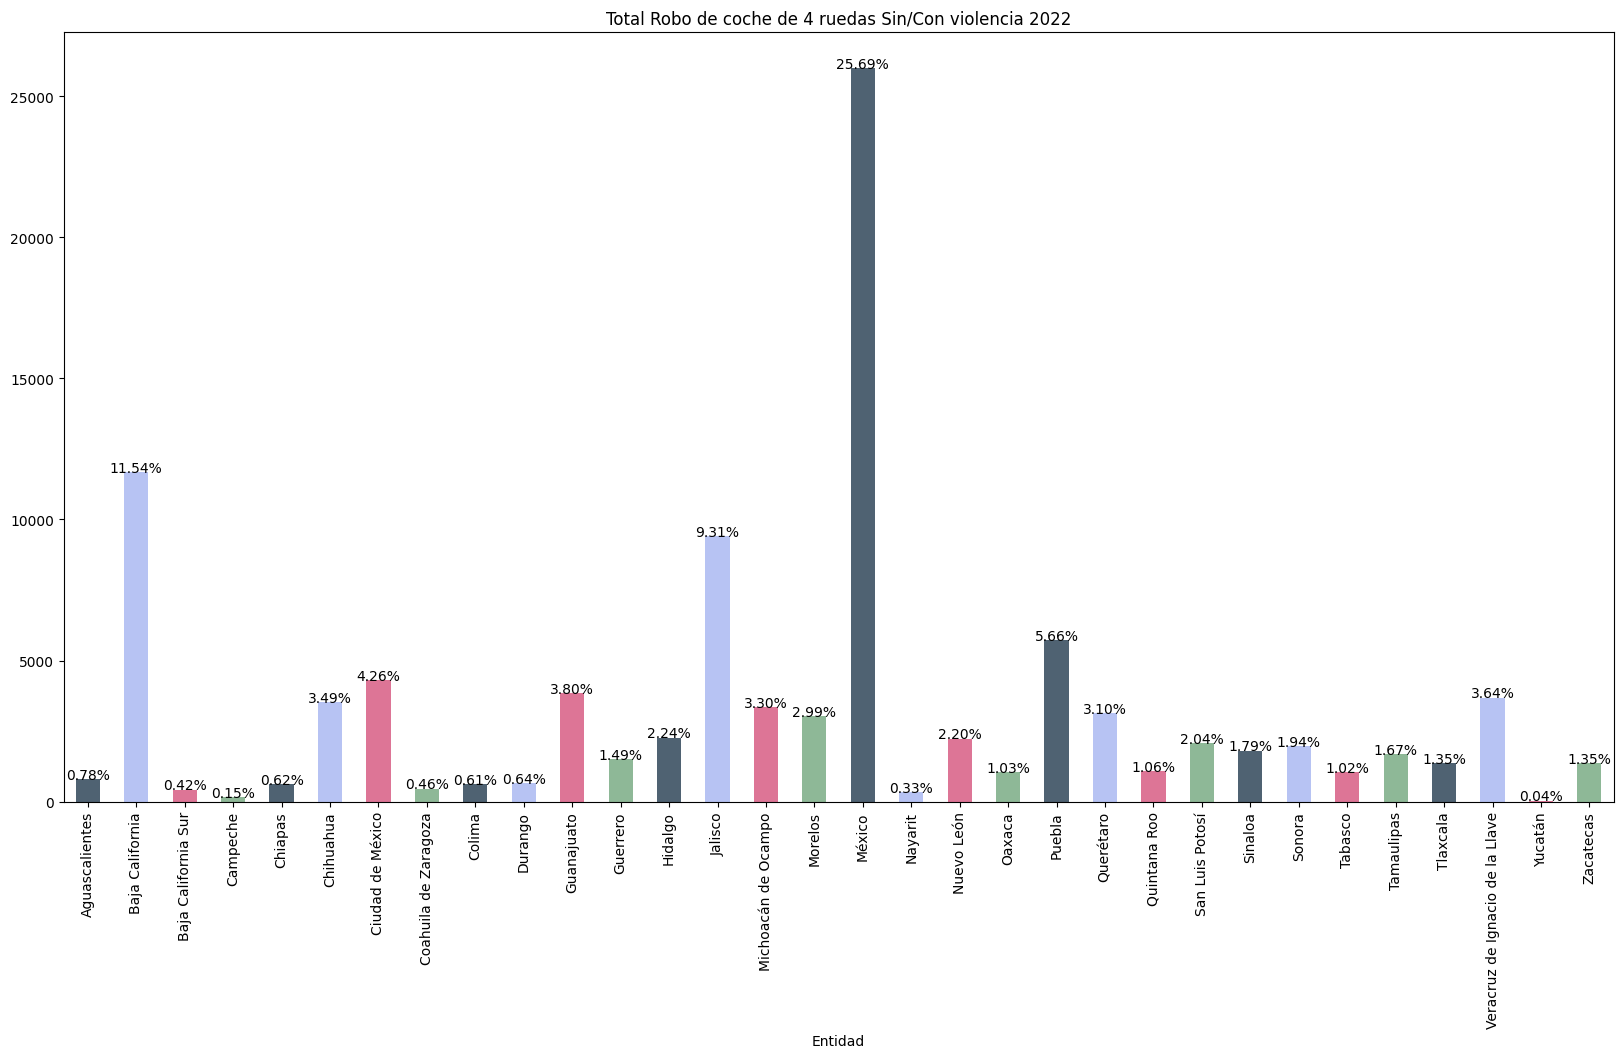

In [83]:
# Calcular los porcentajes
total = sum(totalrc2022['Total'])
totalrc2022['Porcentaje'] = 100 * totalrc2022['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2022.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2022', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2022['Porcentaje']):
    ax.text(i, totalrc2022['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Cargamos el archivo csv que contiene todos los datos de 2015 a 2022
Para que sea más sencillo manipular los datos


## Anailzamos y limpiamos todos los datos

In [37]:
dftodo = pd.read_csv('/content/gdrive/MyDrive/ASE/Municipal-Delitos-2015-2022_dic2022.csv', encoding='ISO-8859-1')
dftodo.head(15)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2,1,0,1
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0,0,0,0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2,0,0,0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0,0,0,0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0,0,0,0
5,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma blanca,0,...,0,0,0,0,0,0,0,0,0,0
6,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,En accidente de tránsito,9,...,3,11,6,4,6,6,11,6,3,7
7,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con otro elemento,0,...,0,0,0,1,0,0,0,0,0,0
8,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,No especificado,1,...,0,3,0,0,0,0,0,0,0,0
9,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Lesiones,Lesiones dolosas,Con arma de fuego,1,...,4,1,1,1,3,2,1,3,2,2


In [84]:
dftodo.tail()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
1832399,2022,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,...,0,0,0,0,0,0,0,0,0,0
1832400,2022,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,0,0,0,0
1832401,2022,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,...,0,0,0,0,0,0,0,0,0,0
1832402,2022,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,...,0,0,0,0,0,0,0,0,0,0
1832403,2022,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Otros delitos del Fuero Común,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
dftodo.shape

(1832404, 21)

In [85]:
dftodob = dftodo[~dftodo['Subtipo de delito'].isin(['Homicidio doloso', 'Homicidio culposo', 'Lesiones dolosas', 
                                                    'Lesiones culposas', 'Feminicidio', 'Aborto', 
                                                    'Otros delitos que atentan contra la vida y la integridad corporal', 'Secuestro', 
                                                    'Tráfico de menores', 'Rapto', 'Otros delitos que atentan contra la libertad personal', 
                                                    'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual', 'Violación simple', 
                                                    'Violación equiparada', 'Incesto', 
                                                    'Otros delitos que atentan contra la libertad y la seguridad sexual', 
                                                    'Robo a casa habitación', 'Robo a transeúnte en vía pública', 
                                                    'Robo a transeúnte en espacio abierto al público', 
                                                    'Robo en transporte público individual', 
                                                    'Robo en transporte público colectivo', 'Robo en transporte individual', 
                                                    'Robo a institución bancaria', 'Robo a negocio', 'Robo de ganado', 'Robo de maquinaria', 
                                                    'Otros robos', 'Fraude', 'Abuso de confianza', 'Extorsión', 'Daño a la propiedad',
                                                    'Despojo', 'Otros delitos contra el patrimonio', 'Violencia familiar', 
                                                    'Violencia de género en todas sus modalidades distinta a la violencia familiar', 
                                                    'Incumplimiento de obligaciones de asistencia familiar', 
                                                    'Otros delitos contra la familia', 'Corrupción de menores', 'Trata de personas', 
                                                    'Otros delitos contra la sociedad', 'Narcomenudeo', 'Amenazas', 'Allanamiento de morada', 
                                                    'Evasión de presos', 'Falsedad', 'Falsificación', 'Contra el medio ambiente', 
                                                    'Delitos cometidos por servidores públicos', 'Electorales', 'Otros delitos del Fuero Común'])]
dftodob.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
41,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,4,3,0,1,1,5,2,5,6,4
42,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,122,124,138,94,89,93,126,105,152,171
43,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,1,...,1,0,0,0,0,2,0,0,1,0
44,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,23,...,21,20,23,17,8,33,29,33,39,34
45,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
dftodob.shape

(186980, 21)

In [87]:
df20todob = dftodo[~dftodo['Subtipo de delito'].isin(['Homicidio doloso', 'Homicidio culposo', 'Lesiones dolosas', 
                                                    'Lesiones culposas', 'Feminicidio', 'Aborto', 
                                                    'Otros delitos que atentan contra la vida y la integridad corporal', 'Secuestro', 
                                                    'Tráfico de menores', 'Rapto', 'Otros delitos que atentan contra la libertad personal', 
                                                    'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual', 'Violación simple', 
                                                    'Violación equiparada', 'Incesto', 
                                                    'Otros delitos que atentan contra la libertad y la seguridad sexual', 
                                                    'Robo a casa habitación', 'Robo a transeúnte en vía pública', 
                                                    'Robo a transeúnte en espacio abierto al público', 
                                                    'Robo en transporte público individual', 
                                                    'Robo en transporte público colectivo', 'Robo en transporte individual', 
                                                    'Robo a institución bancaria', 'Robo a negocio', 'Robo de ganado', 'Robo de maquinaria', 
                                                    'Otros robos', 'Fraude', 'Abuso de confianza', 'Extorsión', 'Daño a la propiedad',
                                                    'Despojo', 'Otros delitos contra el patrimonio', 'Violencia familiar', 
                                                    'Violencia de género en todas sus modalidades distinta a la violencia familiar', 
                                                    'Incumplimiento de obligaciones de asistencia familiar', 
                                                    'Otros delitos contra la familia', 'Corrupción de menores', 'Trata de personas', 
                                                    'Otros delitos contra la sociedad', 'Narcomenudeo', 'Amenazas', 'Allanamiento de morada', 
                                                    'Evasión de presos', 'Falsedad', 'Falsificación', 'Contra el medio ambiente', 
                                                    'Delitos cometidos por servidores públicos', 'Electorales', 'Otros delitos del Fuero Común'])]
dftodob.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,3,0,1,1,5,2,5,6,4,36
42,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,124,138,94,89,93,126,105,152,171,1434
43,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,1,...,0,0,0,0,2,0,0,1,0,5
44,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,23,...,20,23,17,8,33,29,33,39,34,304
45,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
dftodob['Total'] = dftodob[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto', 
                            'Septiembre','Octubre', 'Noviembre', 'Diciembre',]].apply(lambda x: x.sum(), axis=1)

dftodob.head()

<ipython-input-88-af3ece284db8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftodob['Total'] = dftodob[['Enero', 'Febrero', 'Marzo','Abril', 'Mayo', 'Junio','Julio', 'Agosto',


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,3,0,1,1,5,2,5,6,4,36
42,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,124,138,94,89,93,126,105,152,171,1434
43,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,1,...,0,0,0,0,2,0,0,1,0,5
44,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,23,...,20,23,17,8,33,29,33,39,34,304
45,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cochertodo = dftodob.loc[(dftodob['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | 
                       (dftodob['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
cochertodo.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
41,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,4,...,3,0,1,1,5,2,5,6,4,36
42,2015,1,Aguascalientes,1001,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,114,...,124,138,94,89,93,126,105,152,171,1434
139,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,1,0,1,2
140,2015,1,Aguascalientes,1002,Asientos,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,0,0,1,2,0,1,1,1,3,9
237,2015,1,Aguascalientes,1003,Calvillo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrctodo = cochertodo.groupby('Año')['Total'].sum().reset_index()
totalrctodo.head()

,Año,Total
0,2015,145114
1,2016,152596
2,2017,178929
3,2018,177987
4,2019,151878


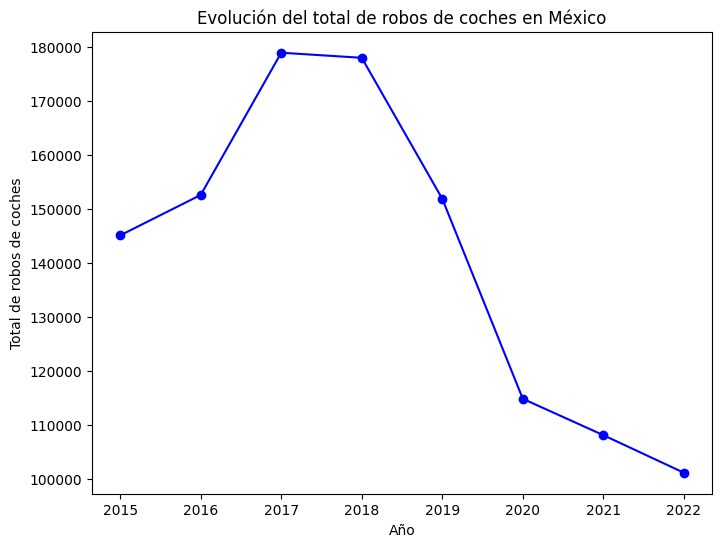

In [95]:
# Crea una figura
fig = plt.figure(figsize=(8, 6))

# Crea un gráfico de línea
plt.plot(totalrctodo['Año'], totalrctodo['Total'], linestyle='-', color='blue', marker='o')

# Añade etiquetas a los ejes X e Y y un título al gráfico
plt.xlabel('Año')
plt.ylabel('Total de robos de coches')
plt.title('Evolución del total de robos de coches en México')

# Muestra el gráfico
plt.show()

In [121]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=totalrctodo['Año'], y=totalrctodo['Total'], mode='lines+markers', line=dict(color='mediumturquoise'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en México', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)

## Vamos a sacar y analizar los estados con menor y mayor número de robos desde 2015 a 2022

In [110]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrctodoent = cochertodo.groupby('Entidad')['Total'].sum().reset_index()
totalrctodoent.head()

,Entidad,Total
0,Aguascalientes,13920
1,Baja California,111690
2,Baja California Sur,7730
3,Campeche,1029
4,Chiapas,9333


In [116]:
# Sacamos los estados que tuvieron mayores robos de 2015 al 2022
tres_estados_mas_robados = totalrctodoent.nlargest(3, 'Total')
tres_estados_mas_robados.head()

,Entidad,Total
16,México,299073
1,Baja California,111690
13,Jalisco,107595


In [117]:
# Sacamos los estados que tuvieron menor número de robos de 2015 al 2022

tres_estados_menos_robados = totalrctodoent.nsmallest(3, 'Total')
tres_estados_menos_robados

,Entidad,Total
30,Yucatán,555
3,Campeche,1029
17,Nayarit,2425


###Estados con mayor número de robos

####Estado de México

In [96]:
# Ejemplo de una entidad en caso de utilizar por municipio donde hay mas robos
em = cochertodo.loc[(cochertodo['Entidad'] == 'México')]
em.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
64525,2015,15,México,15001,Acambay de Ruíz Castañeda,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,2,...,0,1,0,0,2,0,0,3,0,9
64526,2015,15,México,15001,Acambay de Ruíz Castañeda,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,3,...,1,2,2,0,1,7,0,2,0,25
64623,2015,15,México,15002,Acolman,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,18,...,7,10,11,6,8,9,13,9,8,129
64624,2015,15,México,15002,Acolman,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,24,...,11,12,15,16,19,21,14,15,22,198
64721,2015,15,México,15003,Aculco,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,2,1,1,0,0,0,2,2,0,9


In [99]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
emtodo = em.groupby('Año')['Total'].sum().reset_index()
emtodo.head()

,Año,Total
0,2015,43431
1,2016,37932
2,2017,41625
3,2018,47657
4,2019,41042


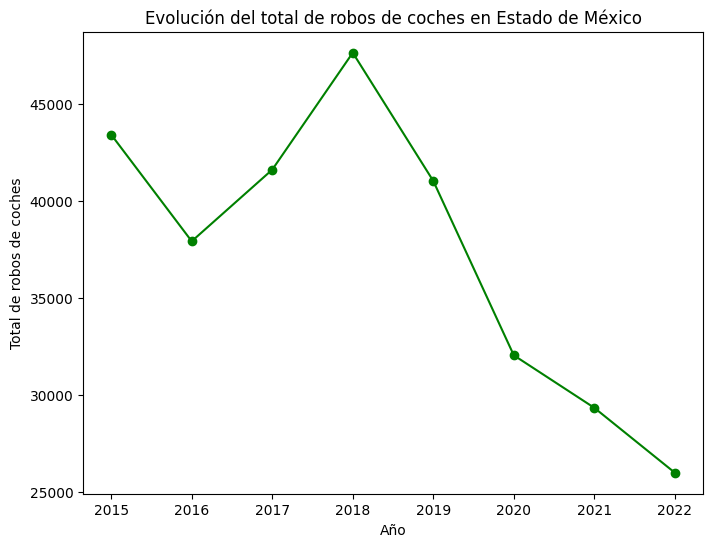

In [123]:
# Crea una figura
fig = plt.figure(figsize=(8, 6))

# Crea un gráfico de línea
plt.plot(emtodo['Año'], emtodo['Total'], linestyle='-', color='green', marker='o')

# Añade etiquetas a los ejes X e Y y un título al gráfico
plt.xlabel('Año')
plt.ylabel('Total de robos de coches')
plt.title('Evolución del total de robos de coches en Estado de México')

# Muestra el gráfico
plt.show()

In [125]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=emtodo['Año'], y=emtodo['Total'], mode='lines+markers', line=dict(color='orange'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en Estado de México', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)


In [163]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
rcmunem = cochertodo.loc[cochertodo['Entidad'] == 'México', ['Municipio','Modalidad', 'Total']].copy()
rcmunem.head()

,Municipio,Modalidad,Total
64525,Acambay de Ruíz Castañeda,Robo de coche de 4 ruedas Con violencia,9
64526,Acambay de Ruíz Castañeda,Robo de coche de 4 ruedas Sin violencia,25
64623,Acolman,Robo de coche de 4 ruedas Con violencia,129
64624,Acolman,Robo de coche de 4 ruedas Sin violencia,198
64721,Aculco,Robo de coche de 4 ruedas Con violencia,9


In [165]:
total_rcmunem = rcmunem.groupby(['Municipio'])['Total'].sum().reset_index()
total_rcmunem.head()

,Municipio,Total
0,Acambay de Ruíz Castañeda,350
1,Acolman,2479
2,Aculco,254
3,Almoloya de Alquisiras,35
4,Almoloya de Juárez,1297


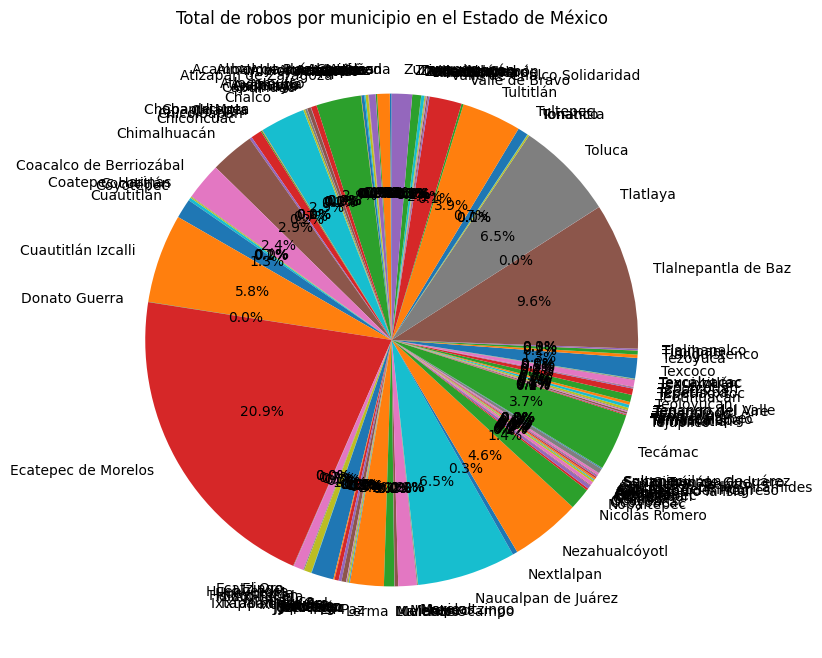

In [167]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(total_rcmunem['Total'], labels=total_rcmunem['Municipio'], autopct='%1.1f%%', startangle=90)

# Añadir título al gráfico
ax.set_title('Total de robos por municipio en el Estado de México')

# Mostrar el gráfico
plt.show()

<ipython-input-195-268e4ce66881>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



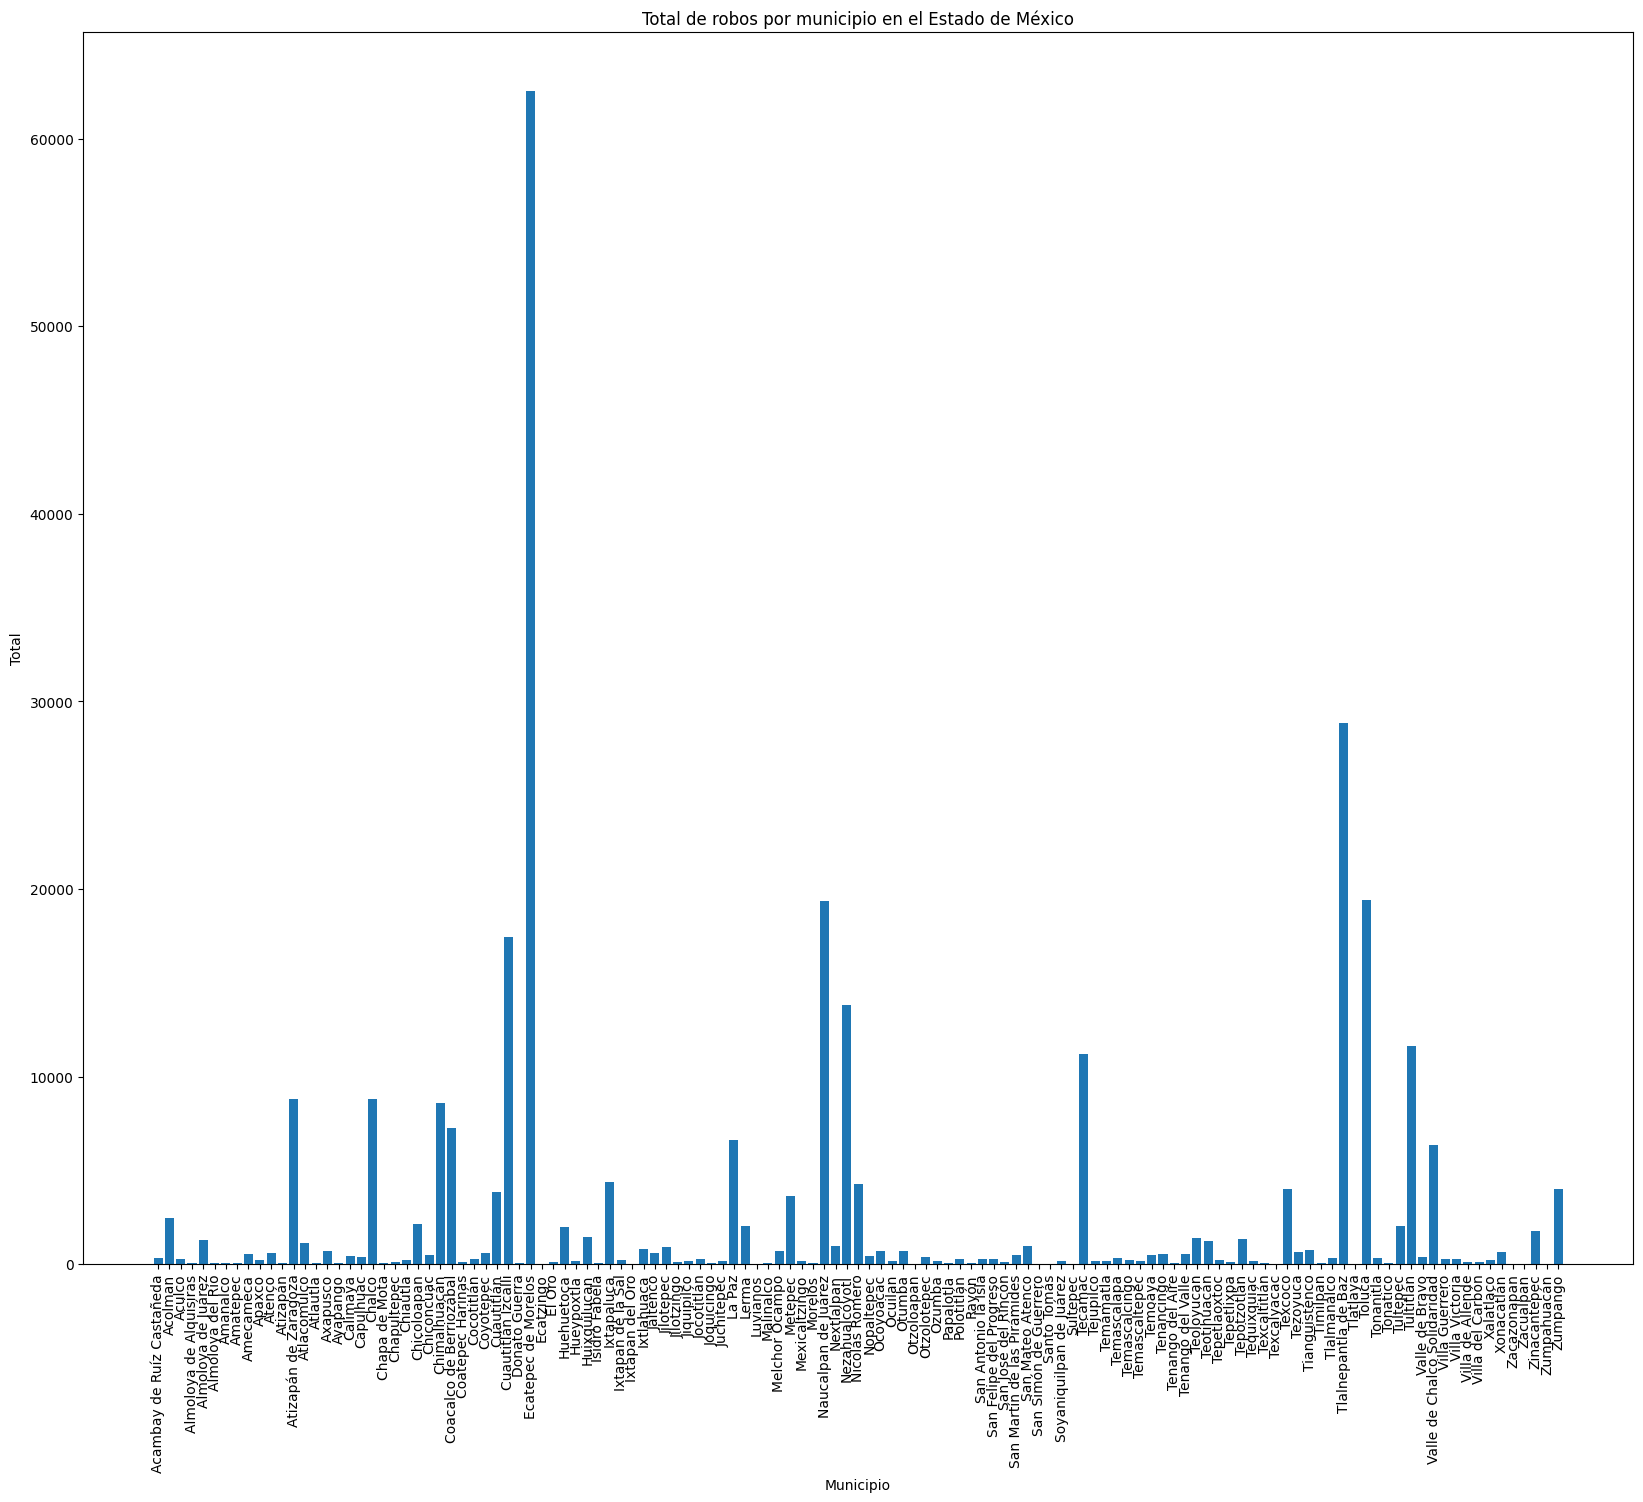

In [195]:
import matplotlib.pyplot as plt

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(20,16))

# Crear un gráfico de barras
ax.bar(total_rcmunem['Municipio'], total_rcmunem['Total'])

# Ajustar las etiquetas del eje x
ax.set_xticklabels(total_rcmunem['Municipio'], rotation=90)

# Añadir título y etiquetas de los ejes
ax.set_title('Total de robos por municipio en el Estado de México')
ax.set_xlabel('Municipio')
ax.set_ylabel('Total')

# Mostrar el gráfico
plt.show()

####Baja California

In [126]:
# Hacemos un df en donde tenga todo lo relacionado con Baja California
bc = cochertodo.loc[(cochertodo['Entidad'] == 'Baja California')]
bc.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
1119,2015,2,Baja California,2001,Ensenada,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
1120,2015,2,Baja California,2001,Ensenada,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,129,...,117,125,114,142,111,120,170,144,136,1477
1217,2015,2,Baja California,2002,Mexicali,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,38,...,22,22,31,32,31,31,25,33,30,342
1218,2015,2,Baja California,2002,Mexicali,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,357,...,404,400,450,430,392,443,511,523,448,5119
1315,2015,2,Baja California,2003,Tecate,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,1,1,2


In [128]:
# Hacemos un df en donde tengamos el total de Baja California y poder graficar
bctodo = bc.groupby('Año')['Total'].sum().reset_index()
bctodo.head()

,Año,Total
0,2015,14138
1,2016,16628
2,2017,19732
3,2018,15425
4,2019,13412


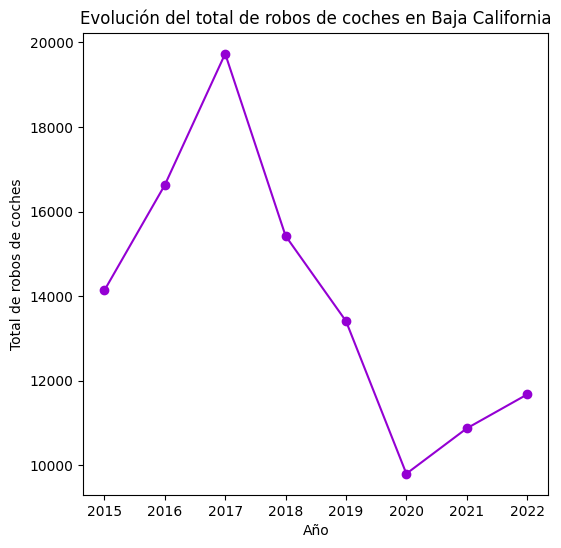

In [130]:
# Crea una figura
fig = plt.figure(figsize=(6, 6))

# Crea un gráfico de línea
plt.plot(bctodo['Año'], bctodo['Total'], linestyle='-', color='darkviolet', marker='o')

# Añade etiquetas a los ejes X e Y y un título al gráfico
plt.xlabel('Año')
plt.ylabel('Total de robos de coches')
plt.title('Evolución del total de robos de coches en Baja California')

# Muestra el gráfico
plt.show()


In [131]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=bctodo['Año'], y=bctodo['Total'], mode='lines+markers', line=dict(color='darkviolet'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en Baja California', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)

In [172]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
rcmunbc = cochertodo.loc[cochertodo['Entidad'] == 'Baja California', ['Municipio','Modalidad', 'Total']].copy()
rcmunbc.head()

,Municipio,Modalidad,Total
1119,Ensenada,Robo de coche de 4 ruedas Con violencia,0
1120,Ensenada,Robo de coche de 4 ruedas Sin violencia,1477
1217,Mexicali,Robo de coche de 4 ruedas Con violencia,342
1218,Mexicali,Robo de coche de 4 ruedas Sin violencia,5119
1315,Tecate,Robo de coche de 4 ruedas Con violencia,2


In [173]:
total_rcmunbc = rcmunbc.groupby(['Municipio'])['Total'].sum().reset_index()
total_rcmunbc.head()

,Municipio,Total
0,Ensenada,14141
1,Mexicali,28497
2,Playas de Rosarito,5507
3,San Felipe,33
4,San Quintín,120


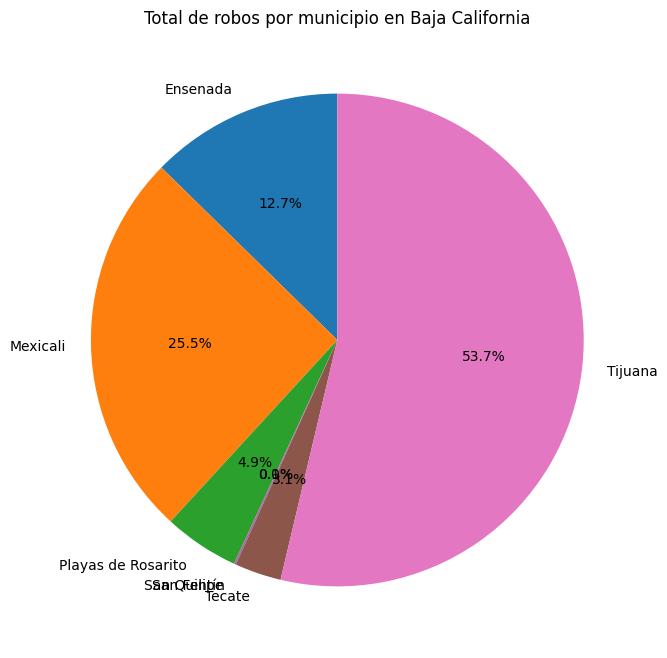

In [174]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(total_rcmunbc['Total'], labels=total_rcmunbc['Municipio'], autopct='%1.1f%%', startangle=90)

# Añadir título al gráfico
ax.set_title('Total de robos por municipio en Baja California')

# Mostrar el gráfico
plt.show()

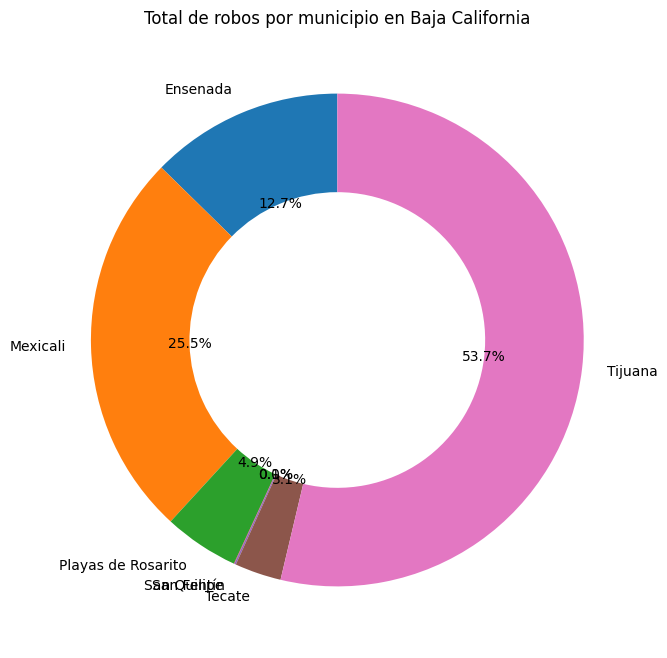

In [176]:
fig, ax = plt.subplots(figsize=(8, 8))

# Establecer el radio interior como 0.6
wedges, texts, autotexts = ax.pie(total_rcmunbc['Total'], wedgeprops={'width': 0.4}, 
                                  labels=total_rcmunbc['Municipio'], autopct='%1.1f%%', startangle=90)

# Establecer el color del fondo como blanco
ax.set_facecolor('white')

# Añadir título al gráfico
ax.set_title('Total de robos por municipio en Baja California')

# Mostrar el gráfico
plt.show()

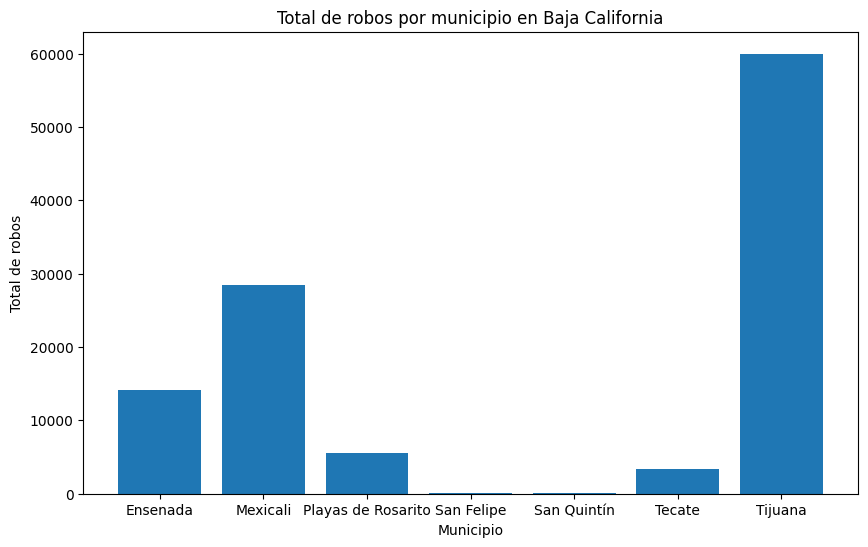

In [190]:
# Obtener los datos a graficar
data = total_rcmunbc['Total']
labels = total_rcmunbc['Municipio']

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, data)

# Añadir título y etiquetas de los ejes
ax.set_title('Total de robos por municipio en Baja California')
ax.set_xlabel('Municipio')
ax.set_ylabel('Total de robos')

# Mostrar el gráfico
plt.show()

####Jalisco

In [132]:
# Hacemos un df en donde tenga todo lo relacionado con Jalisco
j = cochertodo.loc[(cochertodo['Entidad'] == 'Jalisco')]
j.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
52177,2015,14,Jalisco,14001,Acatic,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,1,0,1
52178,2015,14,Jalisco,14001,Acatic,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,1,0,0,1,3,0,1,1,1,8
52275,2015,14,Jalisco,14002,Acatlán de Juárez,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,2
52276,2015,14,Jalisco,14002,Acatlán de Juárez,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,...,1,1,1,0,1,0,1,2,1,13
52373,2015,14,Jalisco,14003,Ahualulco de Mercado,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,1,0,1,2,2,0,6


In [133]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
jtodo = j.groupby('Año')['Total'].sum().reset_index()
jtodo.head()

,Año,Total
0,2015,7253
1,2016,13943
2,2017,20833
3,2018,19910
4,2019,16137


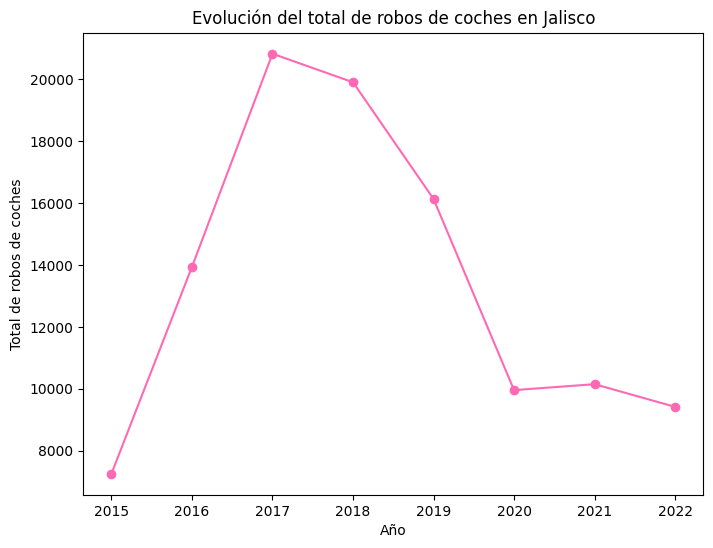

In [134]:
# Crea una figura
fig = plt.figure(figsize=(8, 6))

# Crea un gráfico de línea
plt.plot(jtodo['Año'], jtodo['Total'], linestyle='-', color='hotpink', marker='o')

# Añade etiquetas a los ejes X e Y y un título al gráfico
plt.xlabel('Año')
plt.ylabel('Total de robos de coches')
plt.title('Evolución del total de robos de coches en Jalisco')

# Muestra el gráfico
plt.show()

In [136]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=jtodo['Año'], y=jtodo['Total'], mode='lines+markers', line=dict(color='hotpink'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en Jalisco', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)

In [159]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
rcmunj = cochertodo.loc[cochertodo['Entidad'] == 'Jalisco', ['Municipio','Modalidad', 'Total']].copy()
rcmunj.head()

,Municipio,Modalidad,Total
52177,Acatic,Robo de coche de 4 ruedas Con violencia,1
52178,Acatic,Robo de coche de 4 ruedas Sin violencia,8
52275,Acatlán de Juárez,Robo de coche de 4 ruedas Con violencia,2
52276,Acatlán de Juárez,Robo de coche de 4 ruedas Sin violencia,13
52373,Ahualulco de Mercado,Robo de coche de 4 ruedas Con violencia,6


In [160]:
total_rcmunj = rcmunj.groupby(['Municipio'])['Total'].sum().reset_index()
total_rcmunj.head()

,Municipio,Total
0,Acatic,108
1,Acatlán de Juárez,186
2,Ahualulco de Mercado,82
3,Amacueca,13
4,Amatitán,78


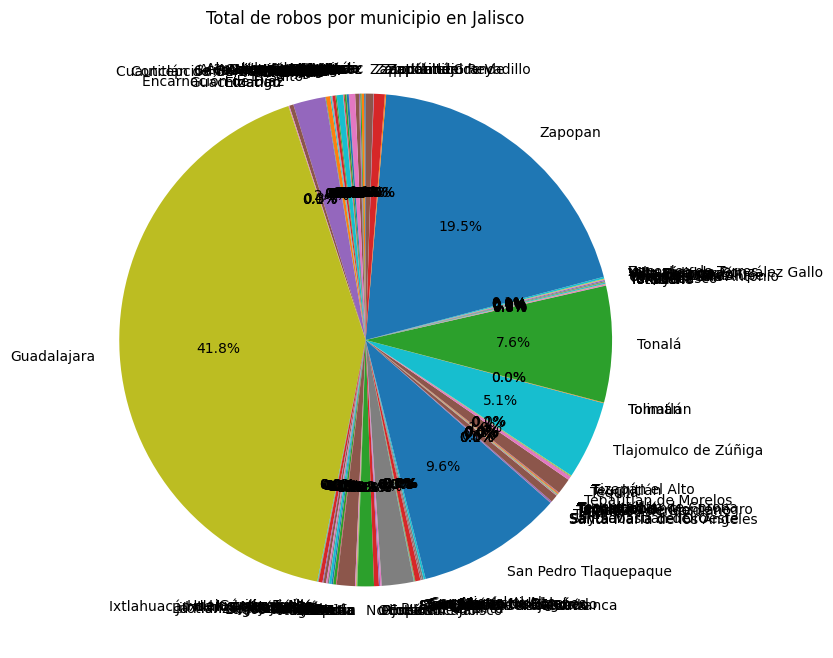

In [162]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(total_rcmunj['Total'], labels=total_rcmunj['Municipio'], autopct='%1.1f%%', startangle=90)

# Añadir título al gráfico
ax.set_title('Total de robos por municipio en Jalisco')

# Mostrar el gráfico
plt.show()

# Datos ENVIPE


In [43]:
envipe = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/conjunto_de_datos_TPer_Vic1_ENVIPE_2022.csv', encoding='ISO-8859-1')
envipe.head(15)

,ID_VIV,ID_HOG,ID_PER,UPM,VIV_SEL,HOGAR,RESUL_H,R_SEL,SEXO,EDAD,...,AP5_6_10,AP5_8,FAC_HOG,FAC_ELE,FAC_HOG_AM,FAC_ELE_AM,DOMINIO,ESTRATO,EST_DIS,UPM_DIS
0,100005.01,0100005.01.01\r,0100005.01.01.02\r,100005,1,1,B\r,2,1,32,...,\r,4,236,472,236\r,472\r,U\r,4,3,1
1,100005.02,0100005.02.01\r,0100005.02.01.01\r,100005,2,1,B\r,1,2,51,...,\r,4,236,472,236\r,472\r,U\r,4,3,1
2,100005.04,0100005.04.01\r,0100005.04.01.02\r,100005,4,1,B\r,2,2,42,...,\r,9,236,472,236\r,472\r,U\r,4,3,1
3,100005.05,0100005.05.01\r,0100005.05.01.01\r,100005,5,1,A\r,1,2,28,...,\r,9,236,236,236\r,236\r,U\r,4,3,1
4,100012.01,0100012.01.01\r,0100012.01.01.01\r,100012,1,1,B\r,1,2,82,...,\r,3,182,365,182\r,365\r,U\r,3,2,2
5,100012.02,0100012.02.01\r,0100012.02.01.02\r,100012,2,1,A\r,2,2,73,...,\r,4,182,365,182\r,365\r,U\r,3,2,2
6,100012.03,0100012.03.01\r,0100012.03.01.03\r,100012,3,1,B\r,3,2,20,...,\r,4,182,729,182\r,729\r,U\r,3,2,2
7,100012.04,0100012.04.01\r,0100012.04.01.03\r,100012,4,1,A\r,3,1,21,...,1\r,1,182,912,182\r,912\r,U\r,3,2,2
8,100012.05,0100012.05.01\r,0100012.05.01.02\r,100012,5,1,B\r,2,2,66,...,9\r,9,182,365,182\r,365\r,U\r,3,2,2
9,100023.01,0100023.01.01\r,0100023.01.01.02\r,100023,1,1,A\r,2,1,58,...,\r,9,201,1004,201\r,1004\r,U\r,3,2,3


In [44]:
envipe.dtypes

ID_VIV        float64
ID_HOG         object
ID_PER         object
UPM             int64
VIV_SEL         int64
               ...   
FAC_ELE_AM     object
DOMINIO        object
ESTRATO         int64
EST_DIS         int64
UPM_DIS         int64
Length: 181, dtype: object